EDA Grupo 2

Cargar y revisar los datos

In [1]:
import pandas as pd

# Cargar los archivos con las rutas nuevas
train_df = pd.read_csv('/app/input/petfinder-adoption-prediction/train/train.csv')
state_labels_df = pd.read_csv('/app/input/petfinder-adoption-prediction/StateLabels.csv')
color_labels_df = pd.read_csv('/app/input/petfinder-adoption-prediction/ColorLabels.csv')
breed_labels_df = pd.read_csv('/app/input/petfinder-adoption-prediction/BreedLabels.csv')

# Mostrar las primeras filas de cada archivo
print("Train Data:")
print(train_df.head())
print("\nState Labels Data:")
print(state_labels_df.head())
print("\nColor Labels Data:")
print(color_labels_df.head())
print("\nBreed Labels Data:")
print(breed_labels_df.head())


Train Data:
   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9

Revisión de Datos Faltantes


In [2]:
# Revisión de datos faltantes
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Data:")
print(missing_data)



Missing Data:
               Missing Values  Percentage
Name                     1265    8.437271
Description                13    0.086707
Age                         0    0.000000
Type                        0    0.000000
Breed2                      0    0.000000
Gender                      0    0.000000
Color1                      0    0.000000
Breed1                      0    0.000000
Color2                      0    0.000000
Color3                      0    0.000000
FurLength                   0    0.000000
MaturitySize                0    0.000000
Dewormed                    0    0.000000
Sterilized                  0    0.000000
Health                      0    0.000000
Vaccinated                  0    0.000000
Quantity                    0    0.000000
Fee                         0    0.000000
RescuerID                   0    0.000000
State                       0    0.000000
VideoAmt                    0    0.000000
PetID                       0    0.000000
PhotoAmt           

Información general del Dataset

In [3]:
# Información general del dataset
print("\nTrain Data Info:")
print(train_df.info())
print("\nTrain Data Describe:")
print(train_df.describe(include='all'))



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  i

Visualización de Distribuciones

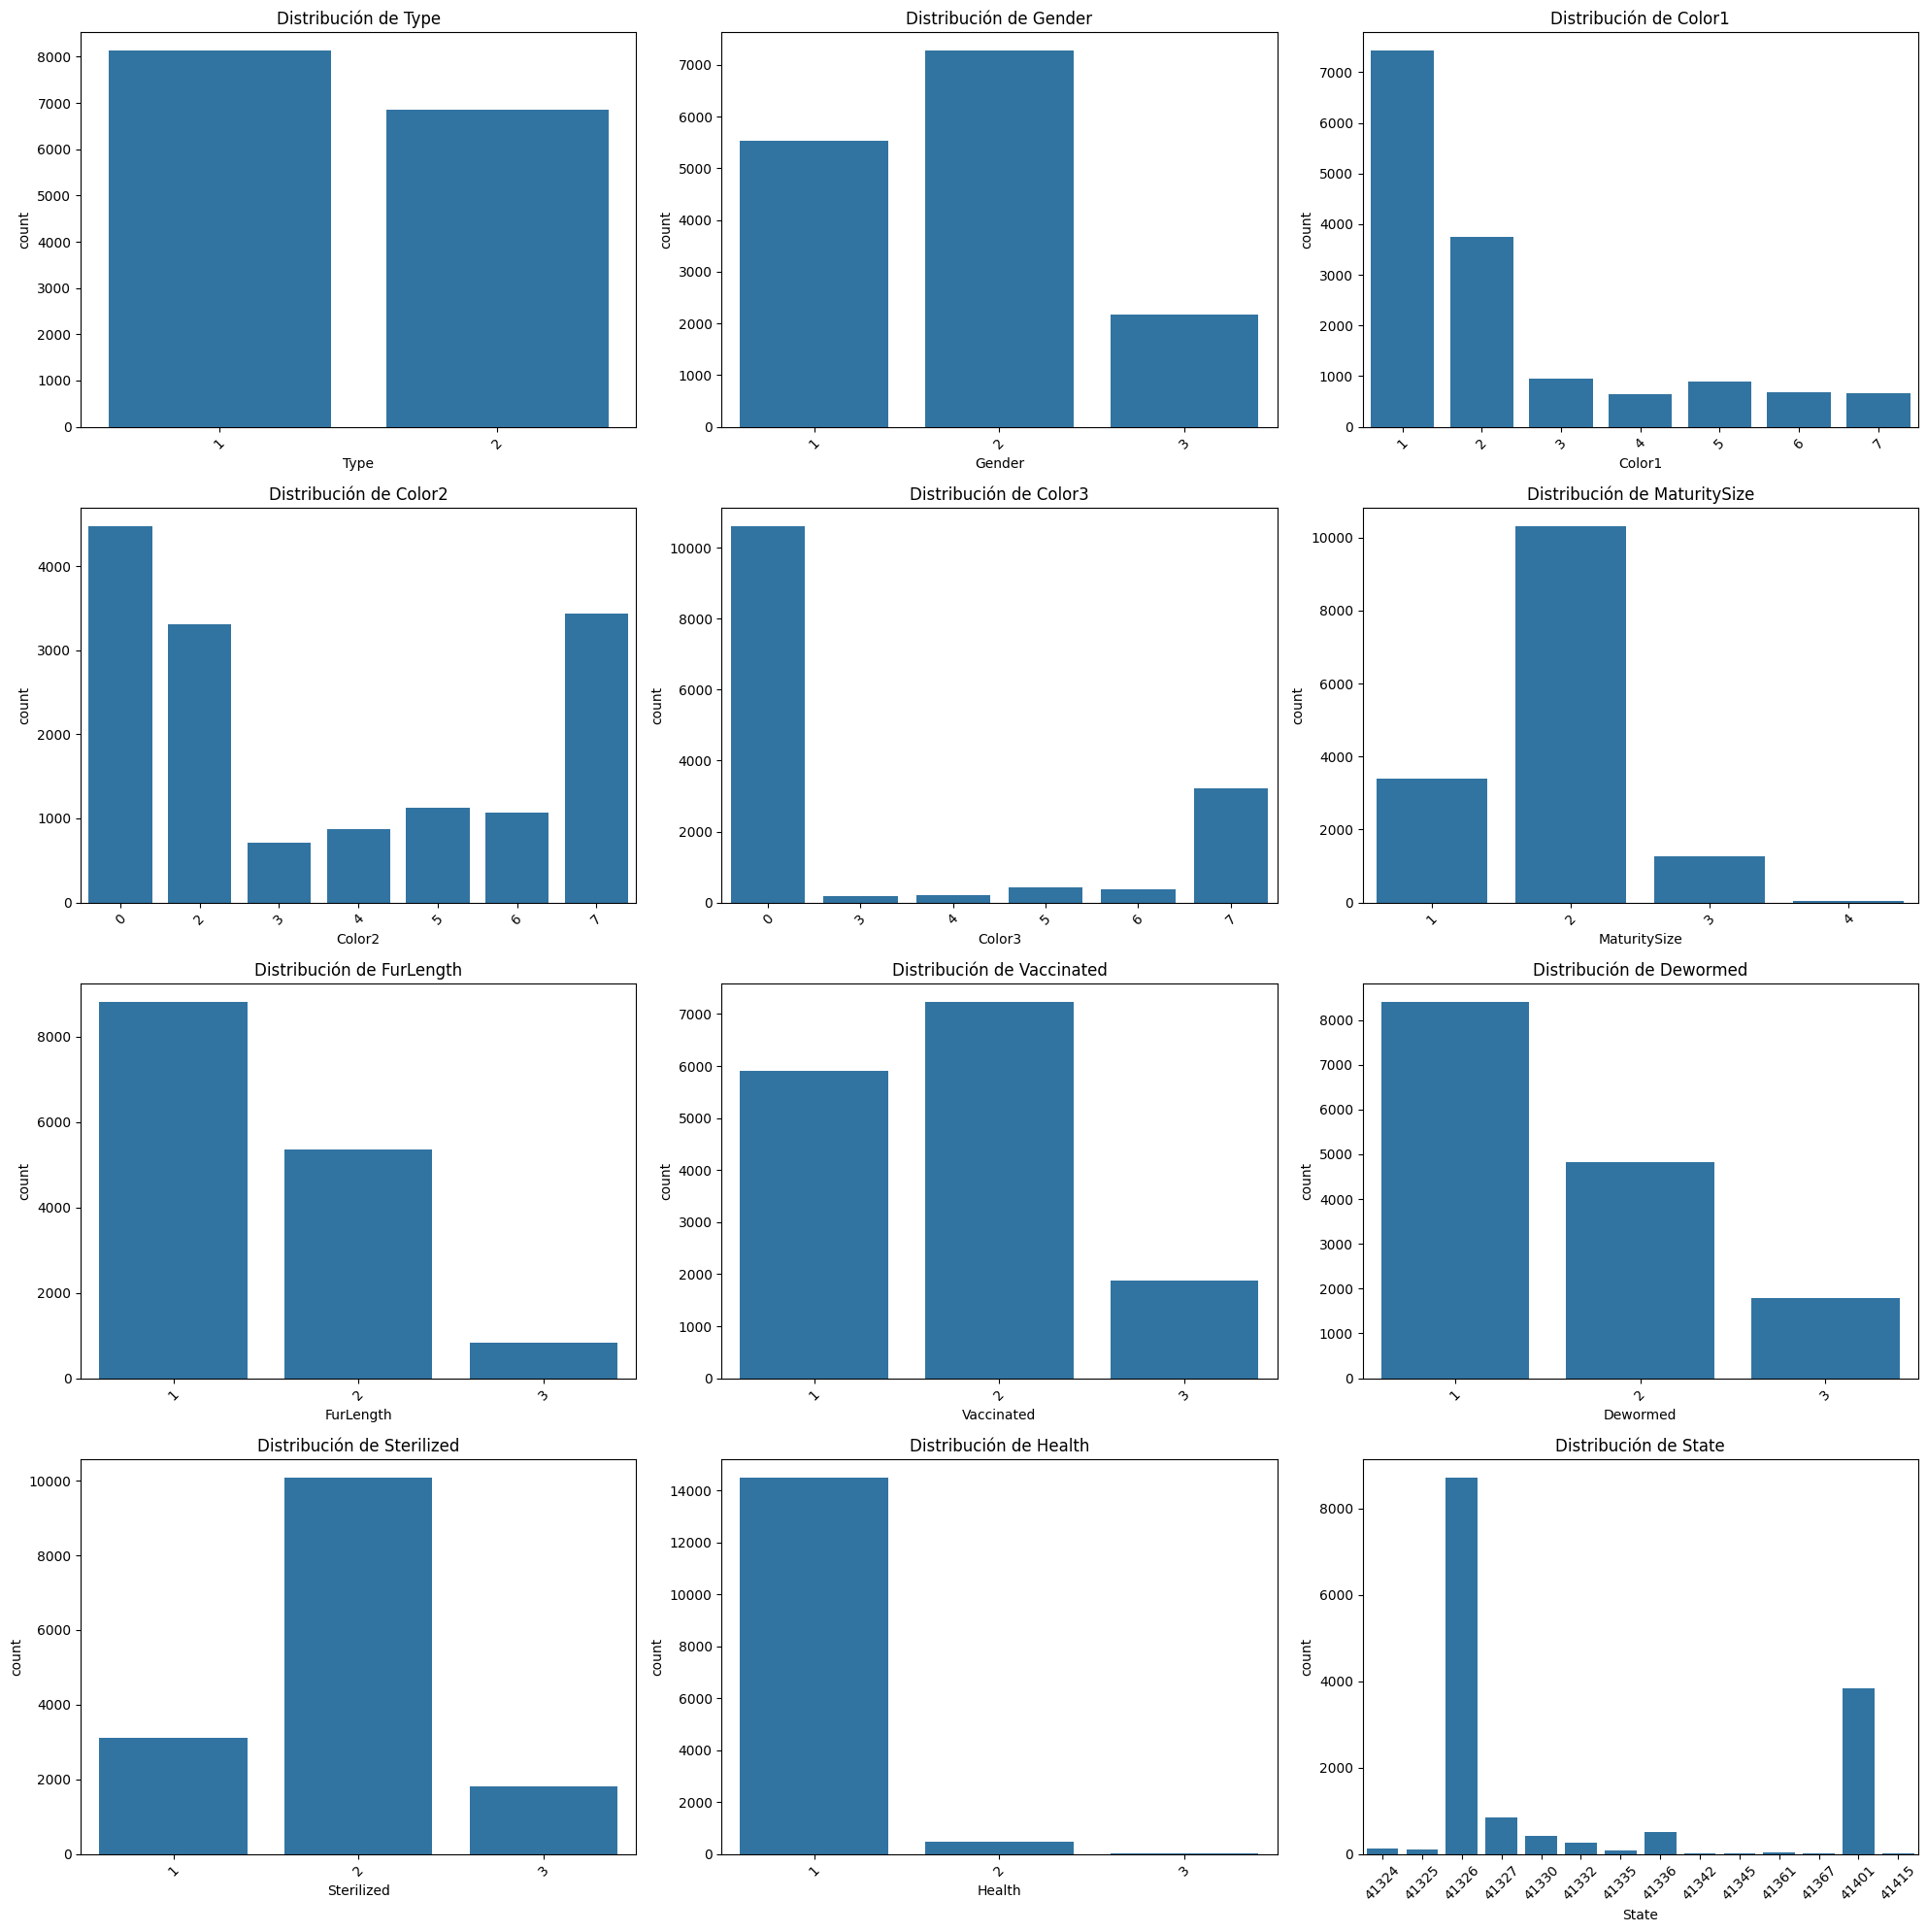

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de variables categóricas
categorical_columns = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=train_df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Variables Numéricas

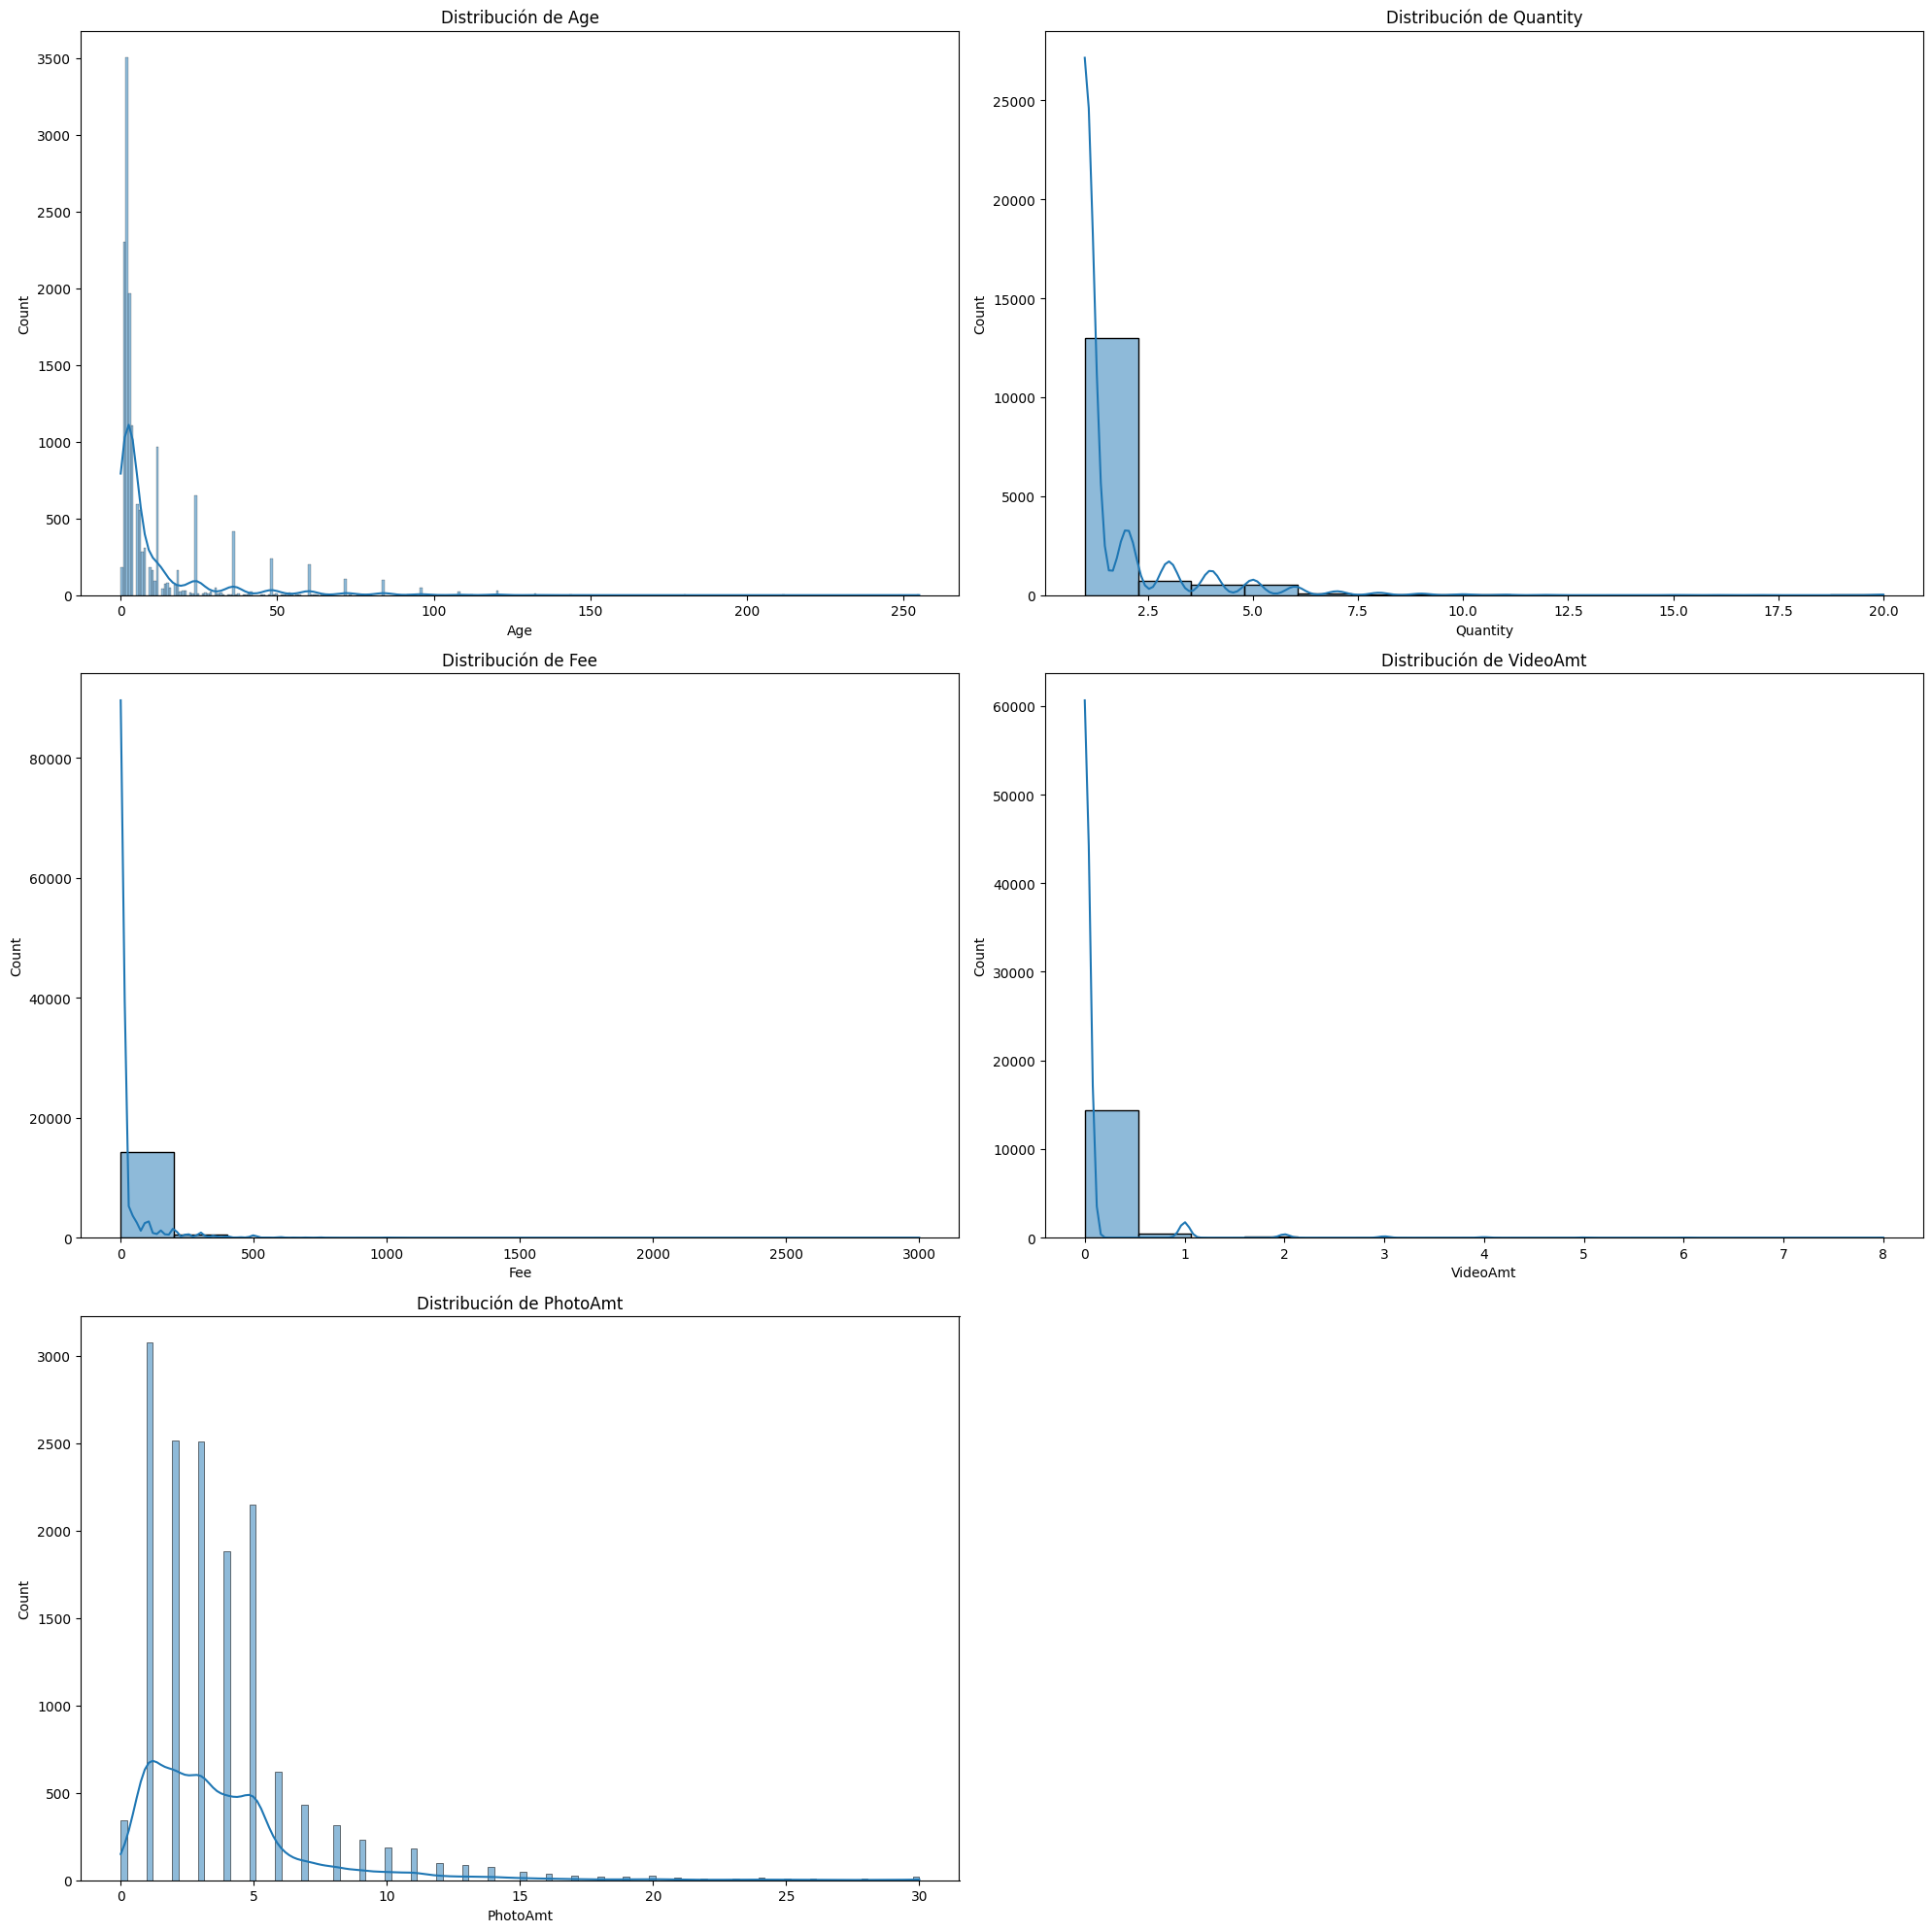

In [5]:
# Visualización de variables numéricas
numerical_columns = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


Análisis Bivariado

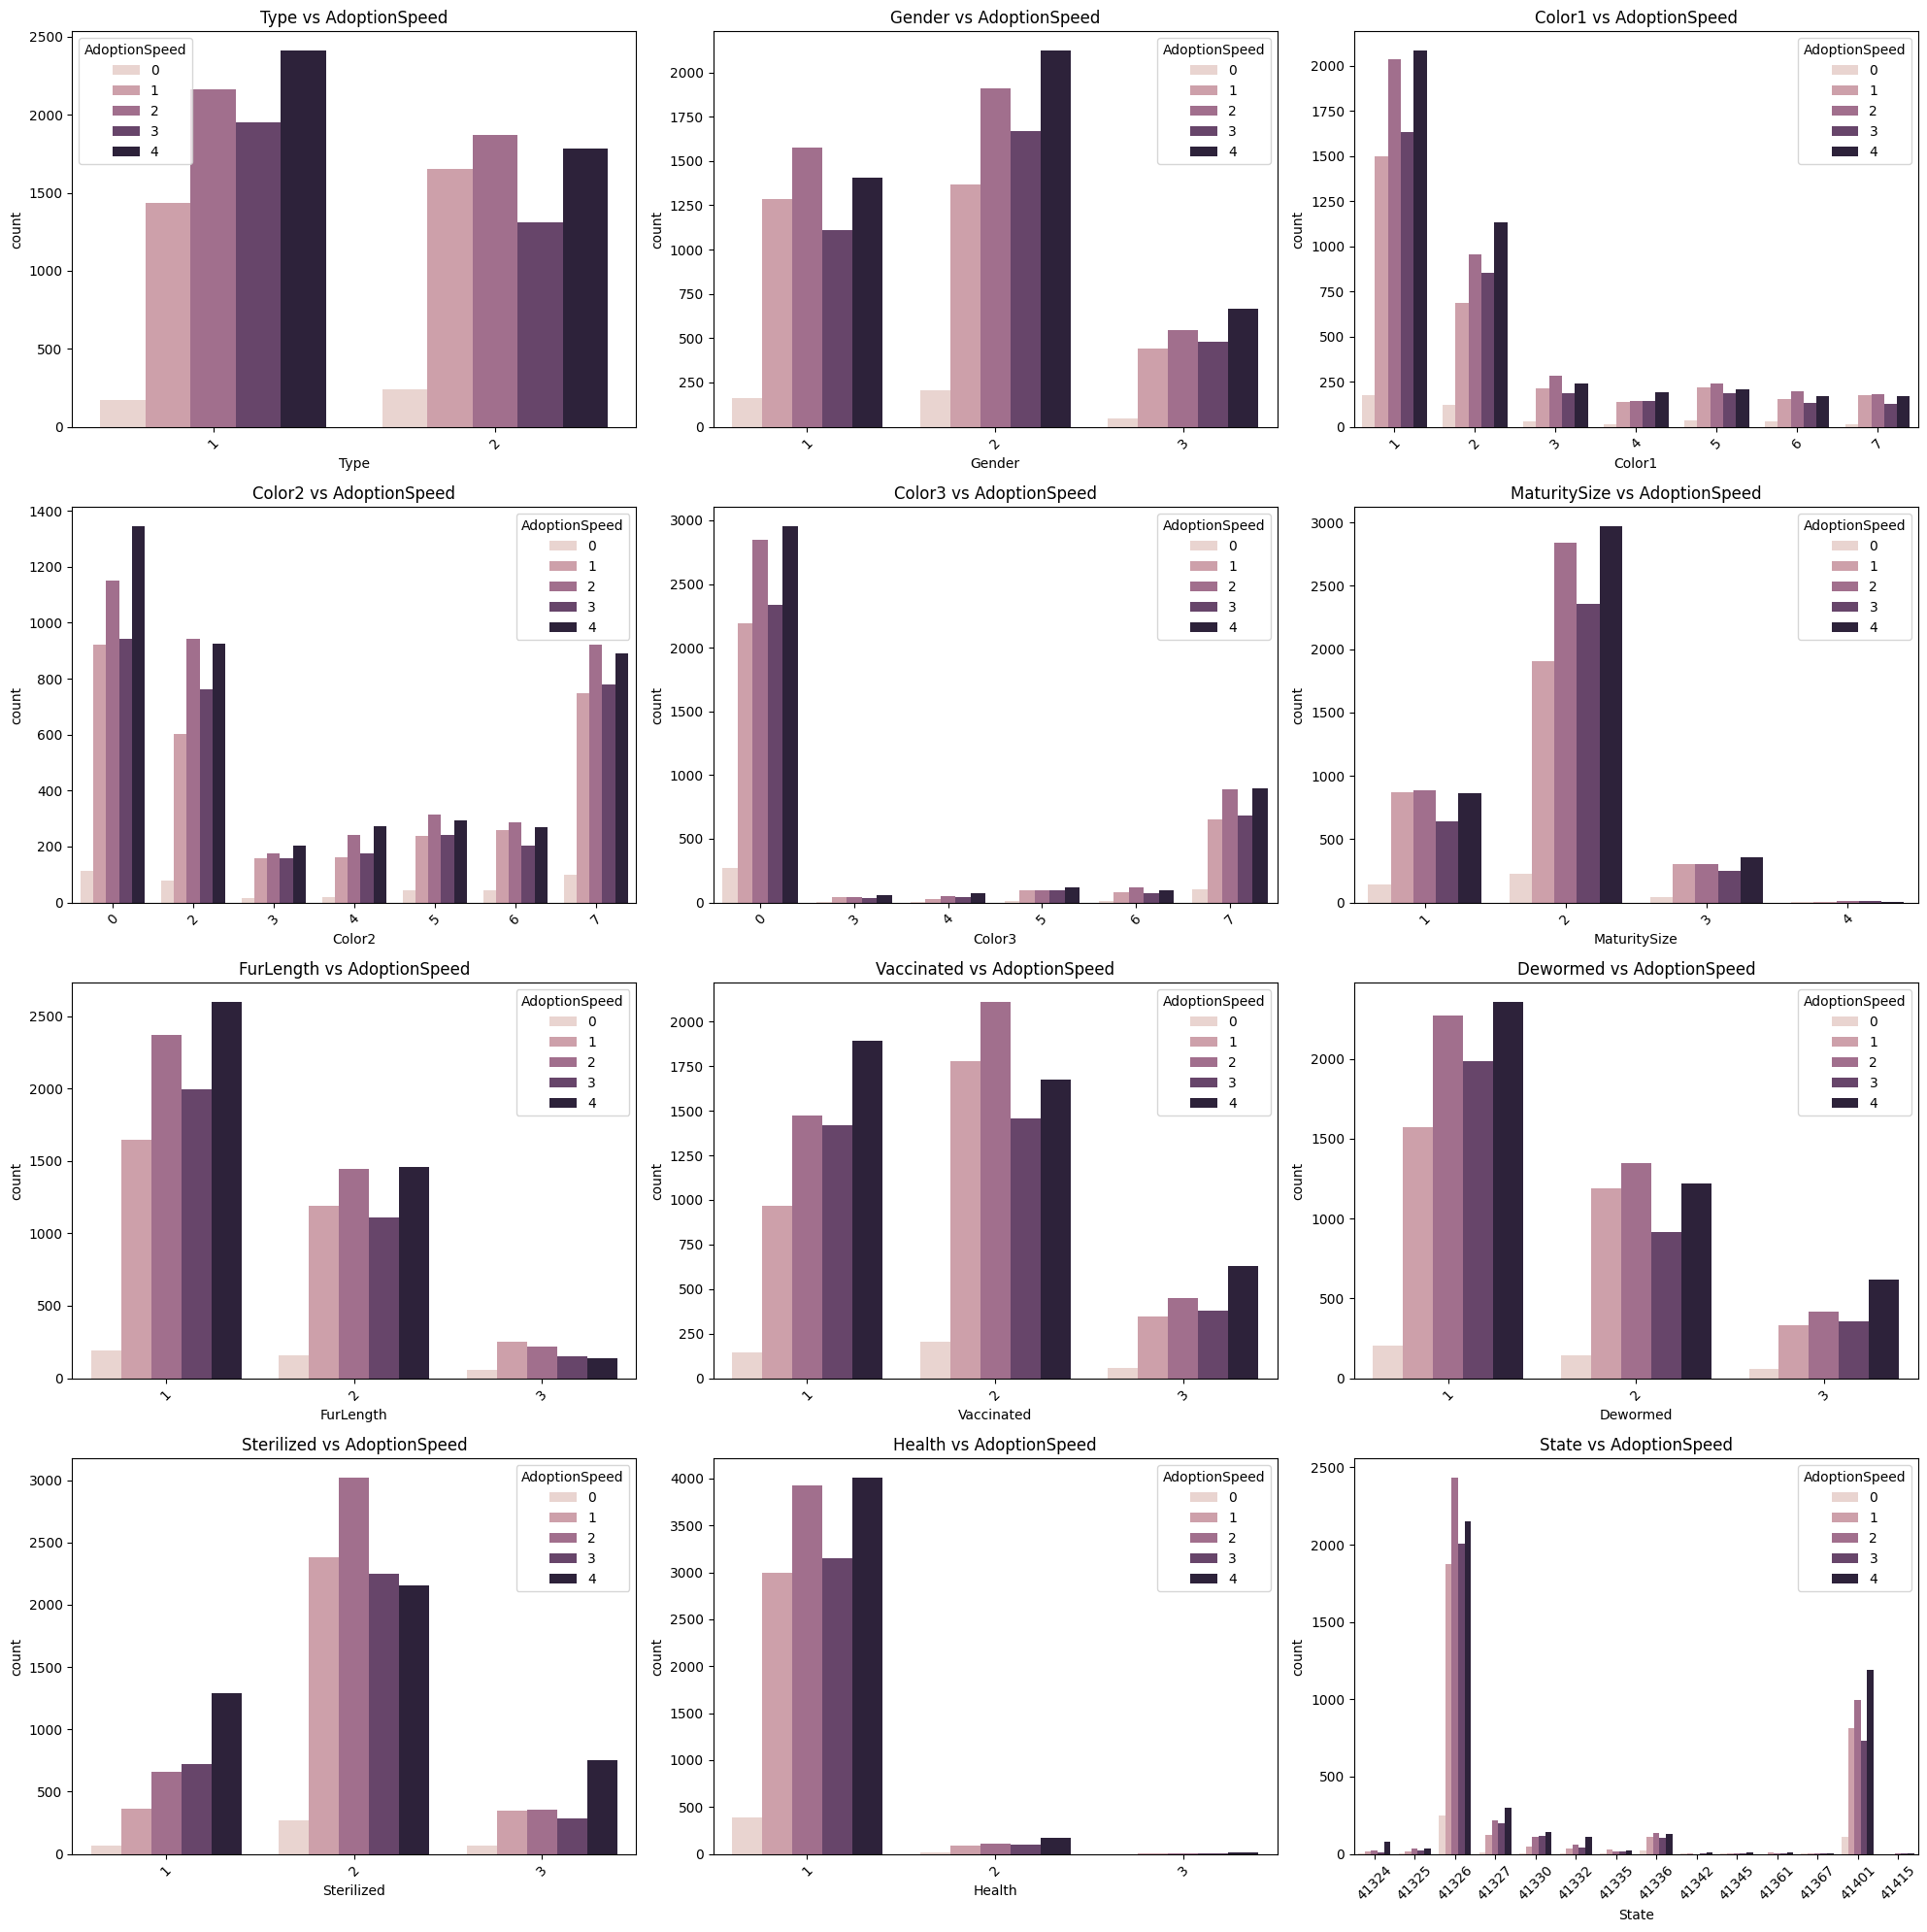

In [6]:
# Análisis bivariado de variables categóricas con AdoptionSpeed
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=train_df, x=col, hue='AdoptionSpeed')
    plt.title(f'{col} vs AdoptionSpeed')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Variables Nuḿericas con AdoptionSpeed

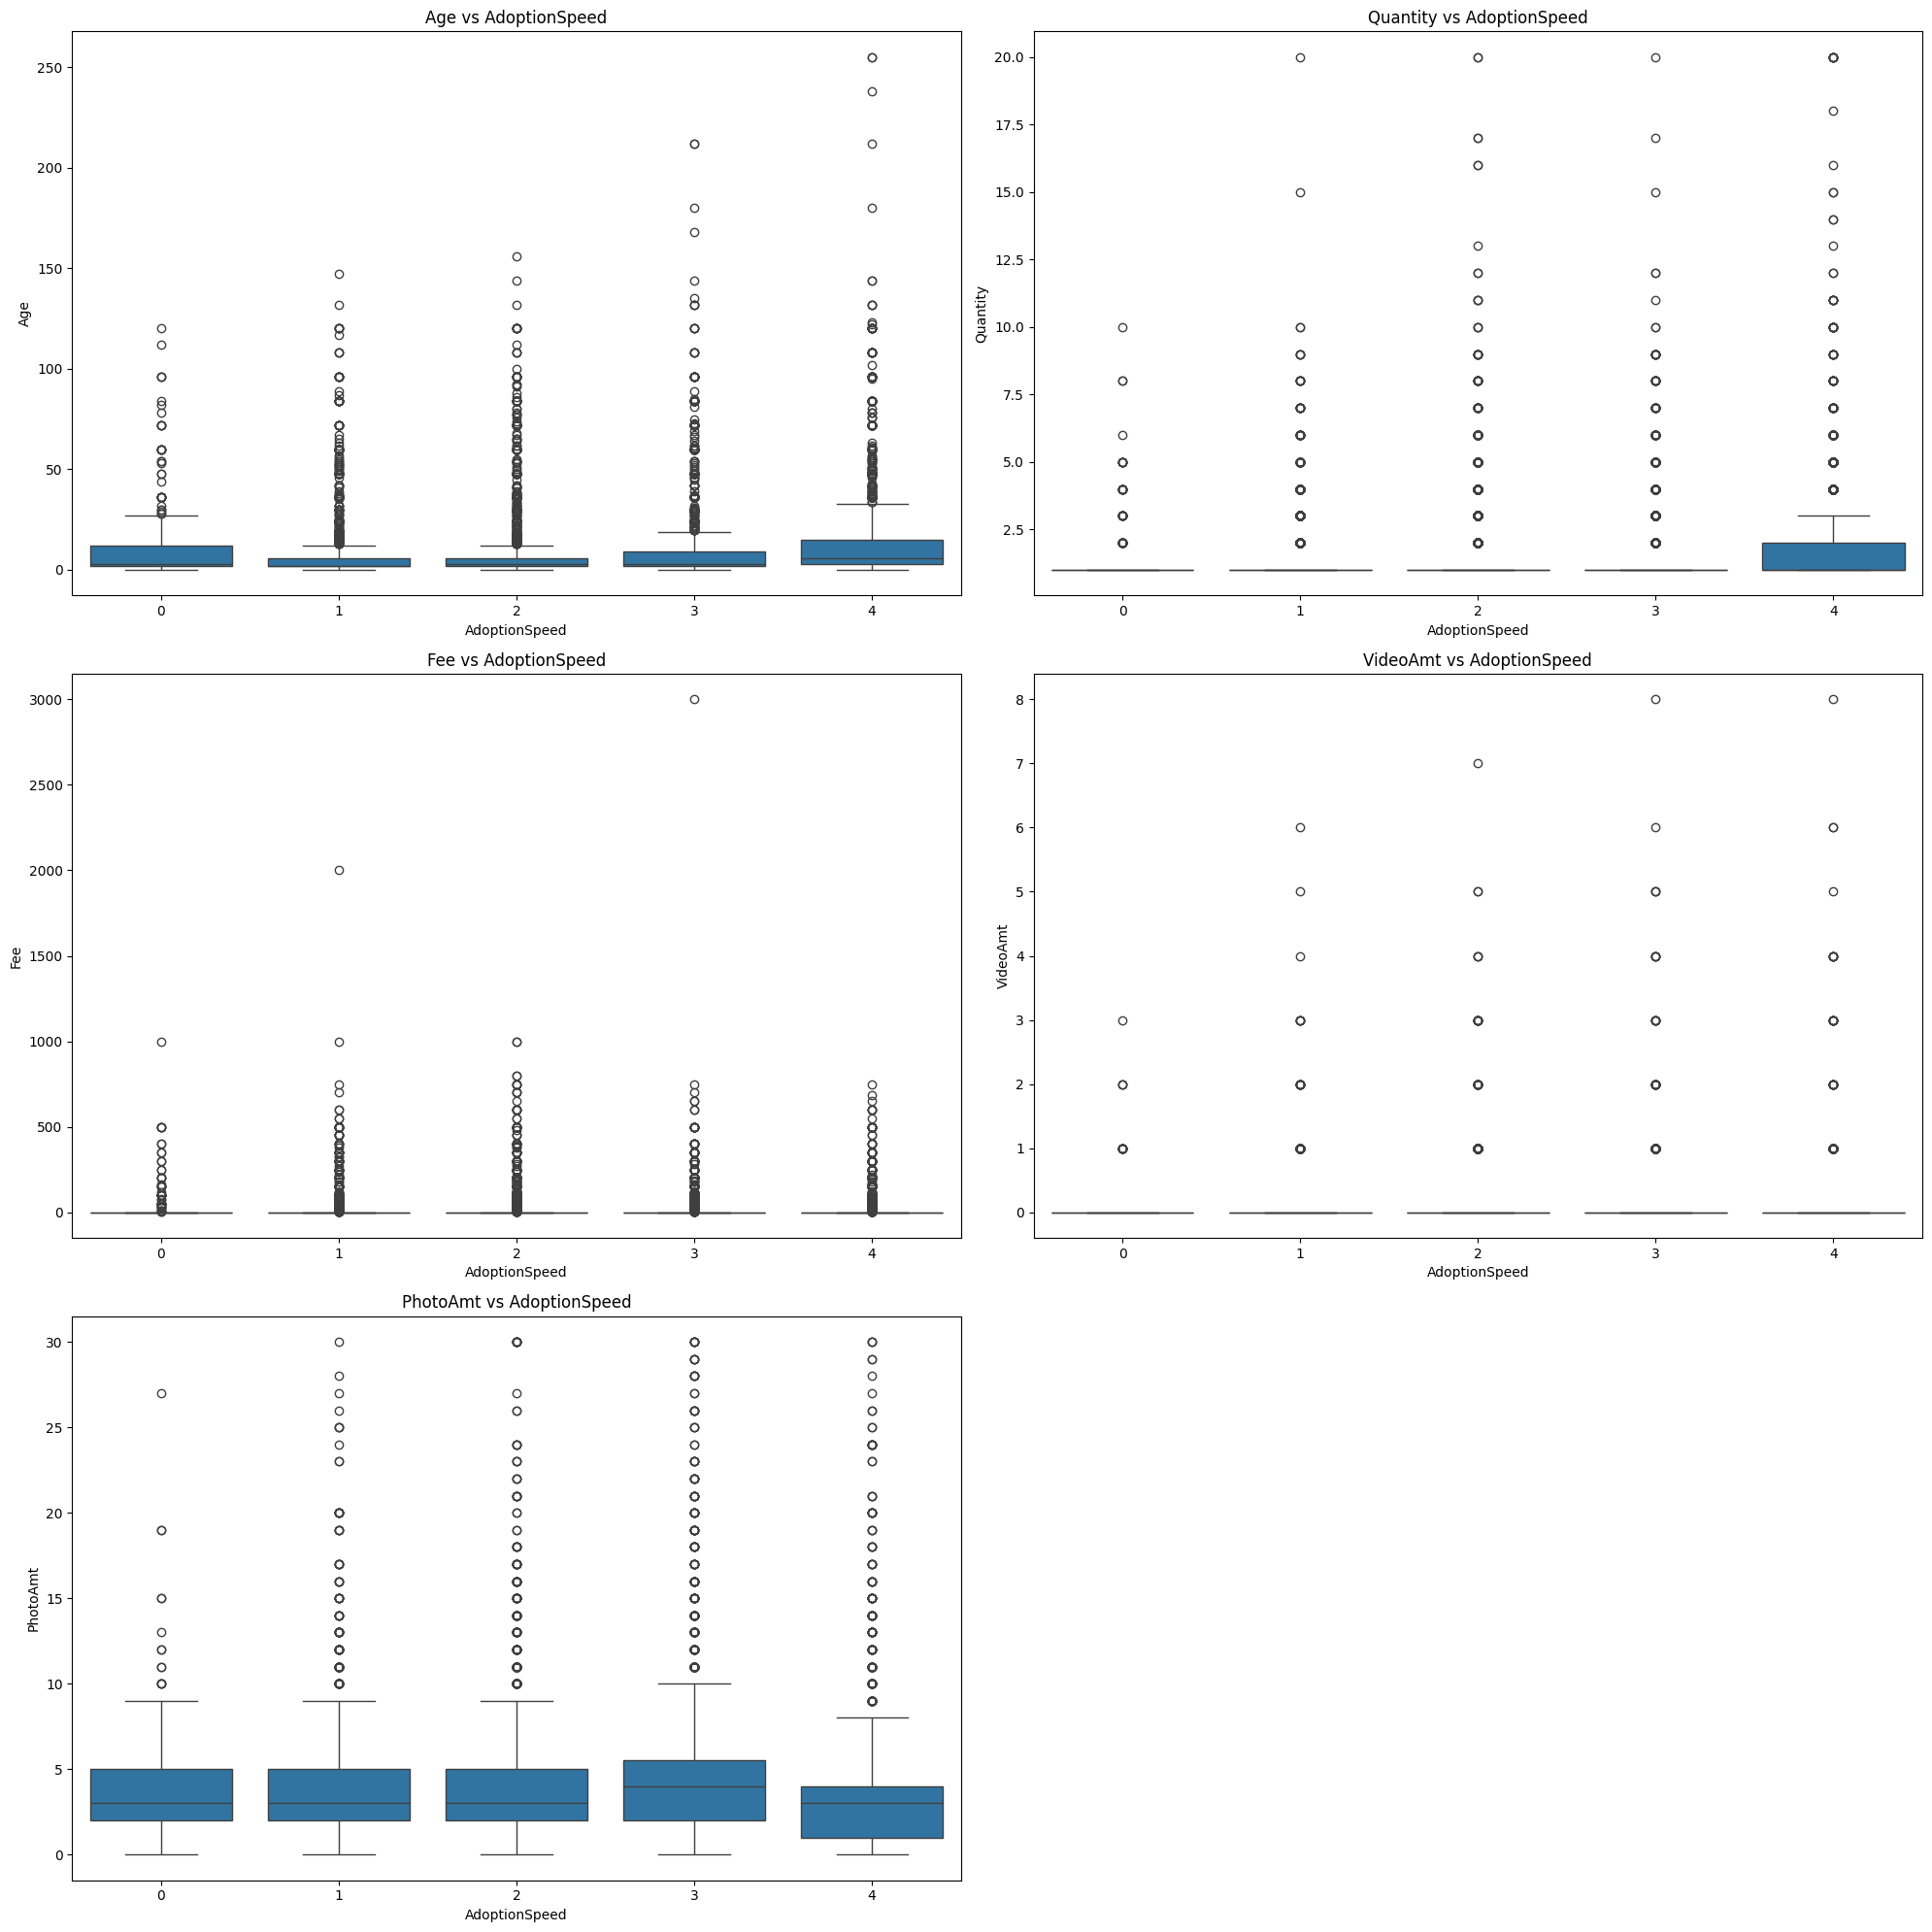

In [7]:
# Análisis bivariado de variables numéricas con AdoptionSpeed
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train_df, x='AdoptionSpeed', y=col)
    plt.title(f'{col} vs AdoptionSpeed')
plt.tight_layout()
plt.show()


Correlaciones Detalladas

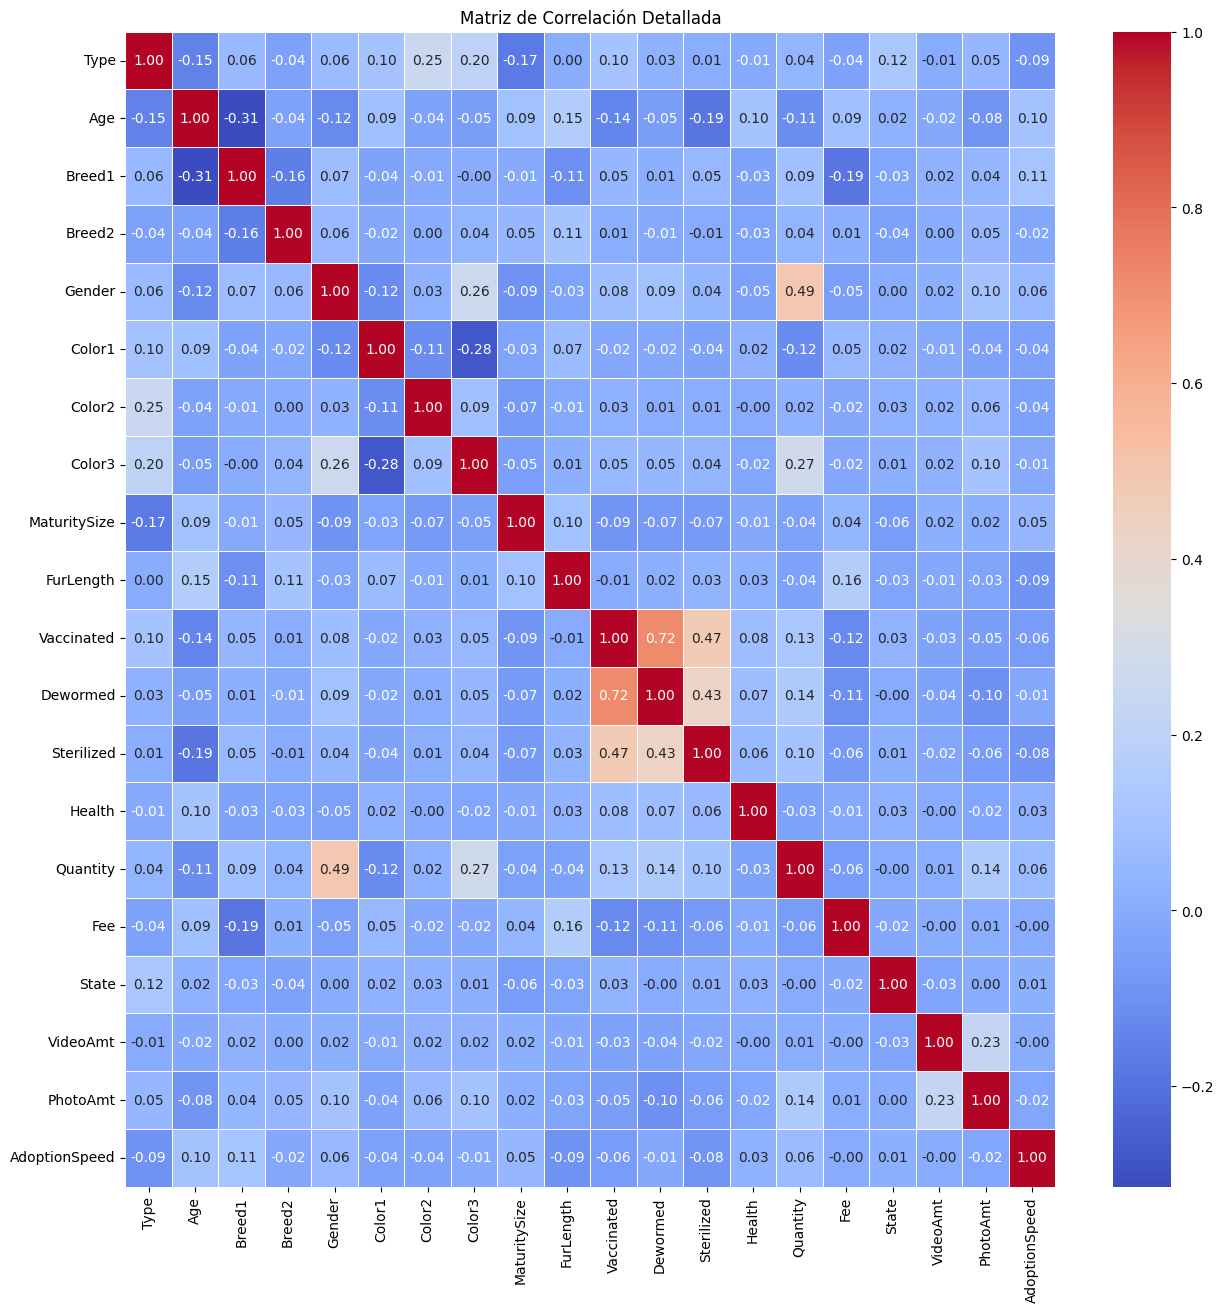

In [8]:
import numpy as np

# Filtrar solo las columnas numéricas
numeric_df = train_df.select_dtypes(include=[np.number])

# Correlaciones detalladas
corr = numeric_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Detallada')
plt.show()


Análisis de Texto Detallado

In [10]:
! pip install wordcloud
! pip install textblob


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.8/788.8 kB 12.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


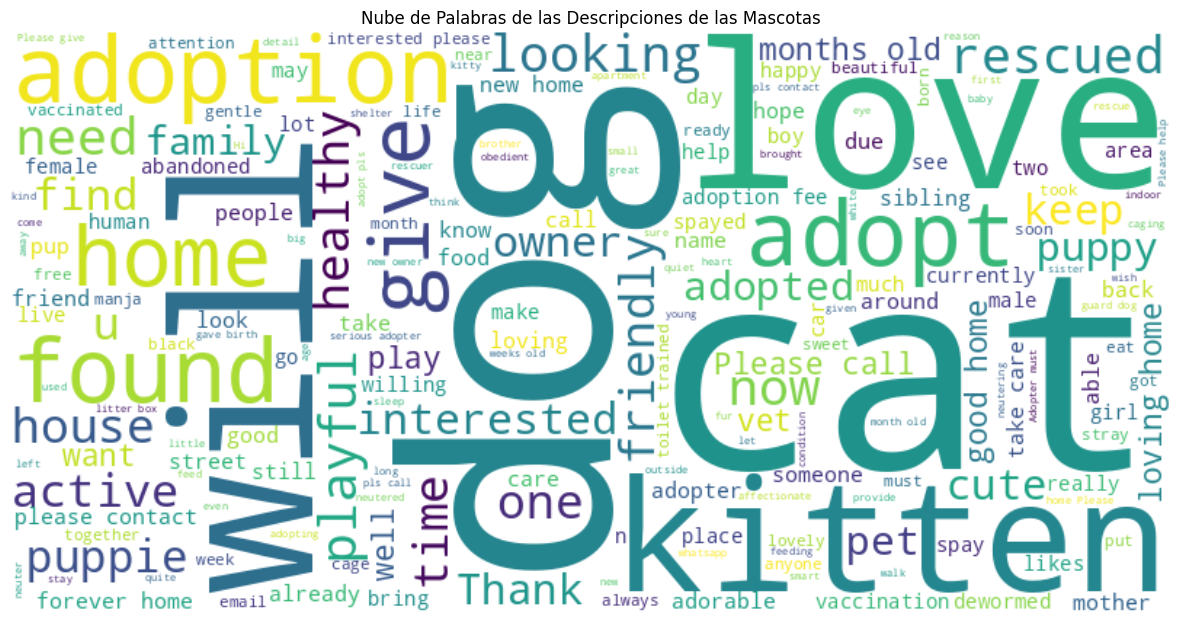

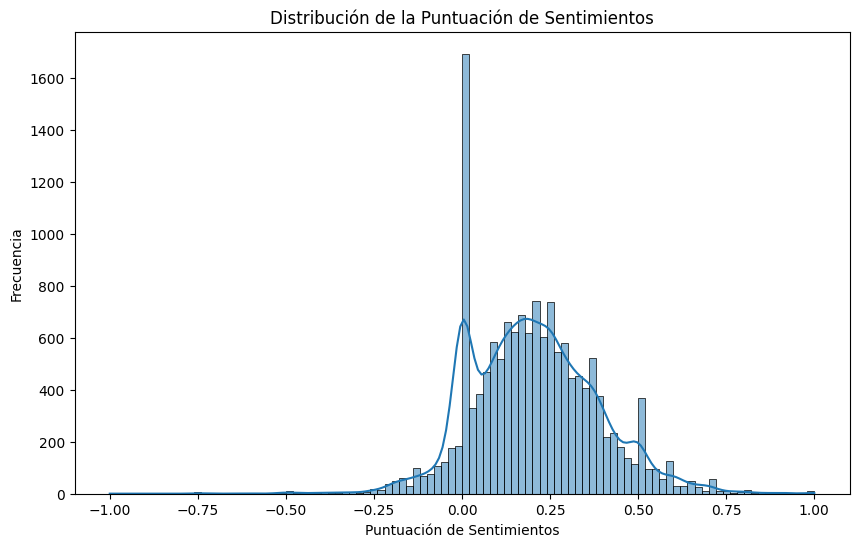

In [11]:
from wordcloud import WordCloud
from textblob import TextBlob
import numpy as np

# Nube de palabras
text = ' '.join(train_df['Description'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Descripciones de las Mascotas')
plt.show()

# Puntuación de sentimientos utilizando TextBlob (si no tienes instalado, usa pip install textblob)
train_df['Sentiment'] = train_df['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualizar la distribución de la puntuación de sentimientos
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Sentiment'], kde=True)
plt.title('Distribución de la Puntuación de Sentimientos')
plt.xlabel('Puntuación de Sentimientos')
plt.ylabel('Frecuencia')
plt.show()


FE Avanzado

In [12]:
# Feature engineering avanzado
train_df['AgeLog'] = np.log1p(train_df['Age'])
train_df['FeeLog'] = np.log1p(train_df['Fee'])

# Interacciones entre variables
train_df['PhotoAmt_Age'] = train_df['PhotoAmt'] * train_df['Age']
train_df['VideoAmt_Age'] = train_df['VideoAmt'] * train_df['Age']

# Verificar las nuevas características
additional_features = ['AgeLog', 'FeeLog', 'PhotoAmt_Age', 'VideoAmt_Age']
print("\nAdditional Features:")
print(train_df[additional_features].head())



Additional Features:
     AgeLog    FeeLog  PhotoAmt_Age  VideoAmt_Age
0  1.386294  4.615121           3.0             0
1  0.693147  0.000000           2.0             0
2  0.693147  0.000000           7.0             0
3  1.609438  5.017280          32.0             0
4  0.693147  0.000000           3.0             0


Detección de Outliers

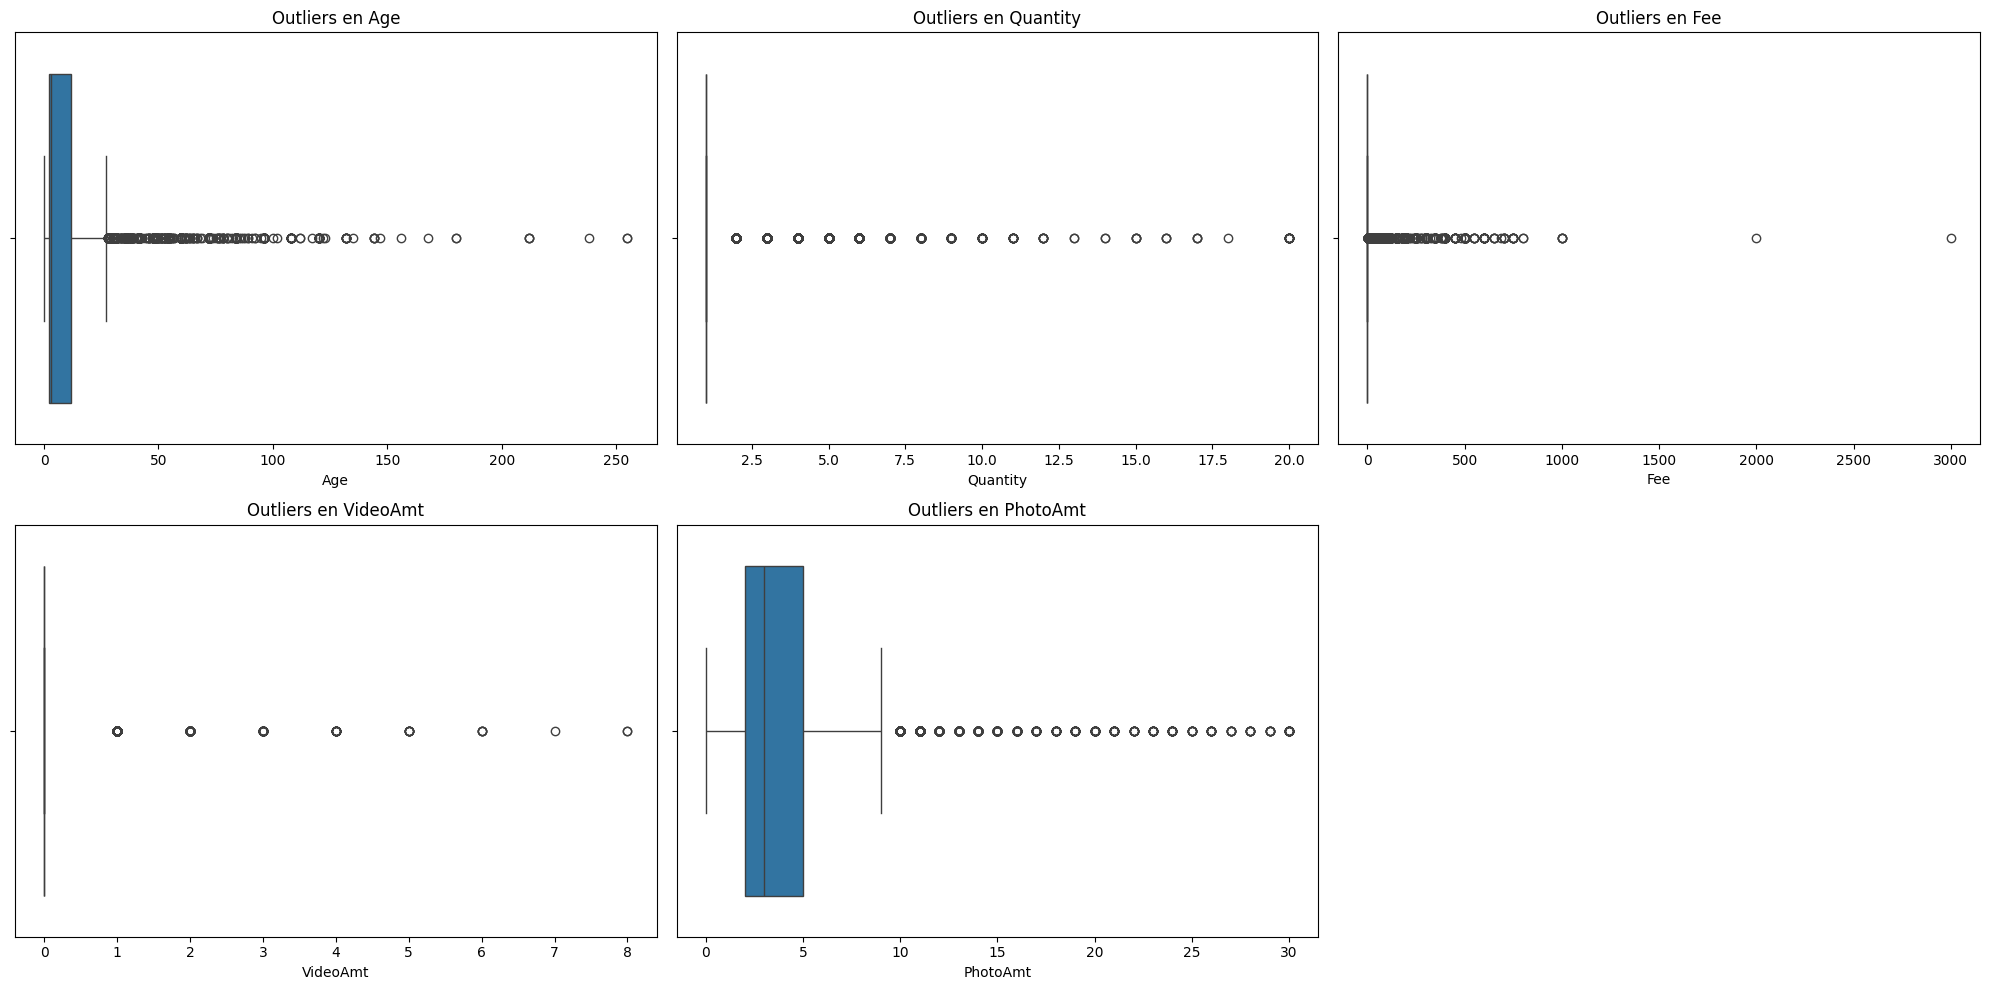

In [13]:
# Visualización de outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Outliers en {col}')
plt.tight_layout()
plt.show()


# Tareas EDA

## Tareas de Pre-procesamiento


1. Chequear Nulos y Decidir si Imputar o Descartar

In [14]:
import pandas as pd
import numpy as np

# Cargar los archivos
train_df = pd.read_csv('/app/input/petfinder-adoption-prediction/train/train.csv')

# Revisar valores nulos
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Data:")
print(missing_data)

# Decidir imputar o descartar
train_df.drop(columns=['Name'], inplace=True)  # Ejemplo: descartar la columna 'Name' si tiene muchos nulos
train_df['Description'].fillna('', inplace=True)  # Ejemplo: llenar los nulos en 'Description' con una cadena vacía



Missing Data:
               Missing Values  Percentage
Name                     1265    8.437271
Description                13    0.086707
Age                         0    0.000000
Type                        0    0.000000
Breed2                      0    0.000000
Gender                      0    0.000000
Color1                      0    0.000000
Breed1                      0    0.000000
Color2                      0    0.000000
Color3                      0    0.000000
FurLength                   0    0.000000
MaturitySize                0    0.000000
Dewormed                    0    0.000000
Sterilized                  0    0.000000
Health                      0    0.000000
Vaccinated                  0    0.000000
Quantity                    0    0.000000
Fee                         0    0.000000
RescuerID                   0    0.000000
State                       0    0.000000
VideoAmt                    0    0.000000
PetID                       0    0.000000
PhotoAmt           

/tmp/ipykernel_367154/3922537477.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Description'].fillna('', inplace=True)  # Ejemplo: llenar los nulos en 'Description' con una cadena vacía


2. Chequear Variables Categóricas y Convertirlas en Numéricas


In [15]:
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas a numéricas
categorical_columns = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le


3. Estandarizar o Normalizar


In [16]:
from sklearn.preprocessing import StandardScaler

# Estandarizar variables numéricas
numeric_columns = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
scaler = StandardScaler()
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])


# Ideas para EDA
## 1. Analizar la Raza de las Mascotas

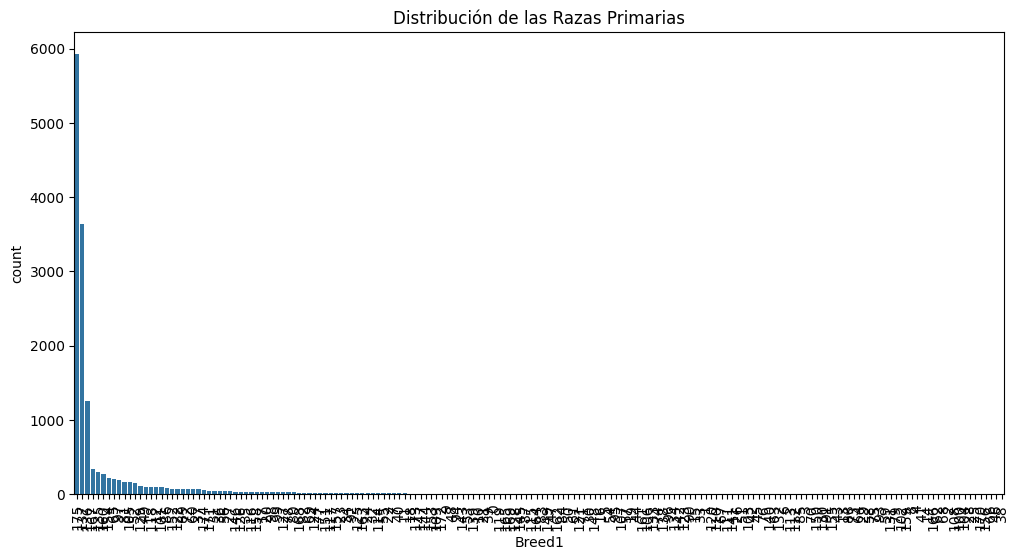

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analizar la raza de las mascotas
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Breed1', order=train_df['Breed1'].value_counts().index)
plt.title('Distribución de las Razas Primarias')
plt.xticks(rotation=90)
plt.show()


2. Analizar el Género


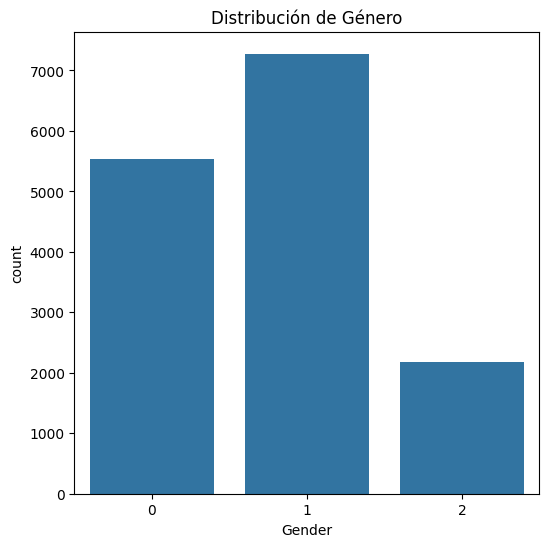

In [18]:
# Analizar el género de las mascotas
plt.figure(figsize=(6, 6))
sns.countplot(data=train_df, x='Gender')
plt.title('Distribución de Género')
plt.show()


3. Analizar los 3 Colores Informados para cada Mascota


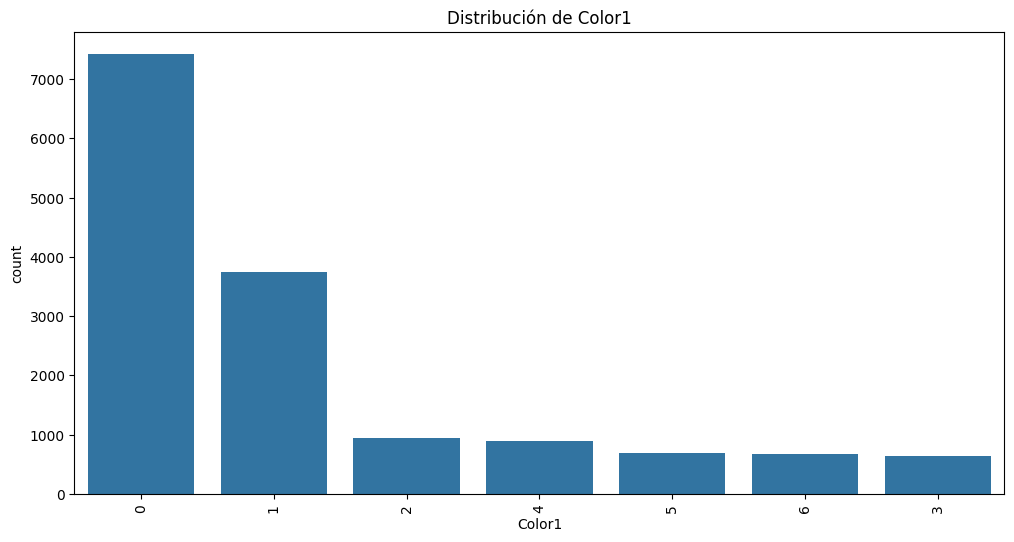

In [19]:
# Analizar los colores de las mascotas
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Color1', order=train_df['Color1'].value_counts().index)
plt.title('Distribución de Color1')
plt.xticks(rotation=90)
plt.show()


4. Estudiar las Variables de Salud


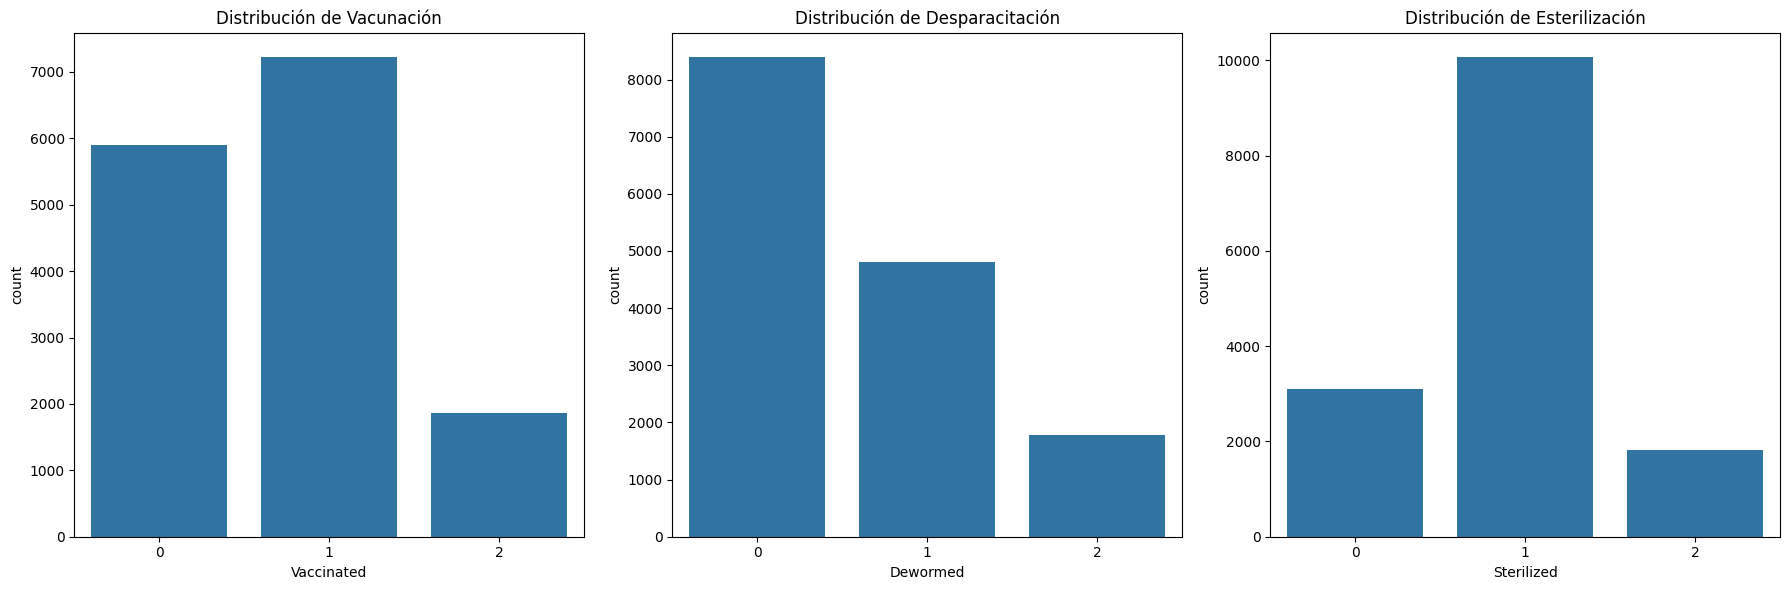

In [20]:
# Analizar vacunación, esterilización y desparacitación
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x='Vaccinated')
plt.title('Distribución de Vacunación')

plt.subplot(1, 3, 2)
sns.countplot(data=train_df, x='Dewormed')
plt.title('Distribución de Desparacitación')

plt.subplot(1, 3, 3)
sns.countplot(data=train_df, x='Sterilized')
plt.title('Distribución de Esterilización')

plt.tight_layout()
plt.show()


5. Entender el Impacto del Fee Cobrado


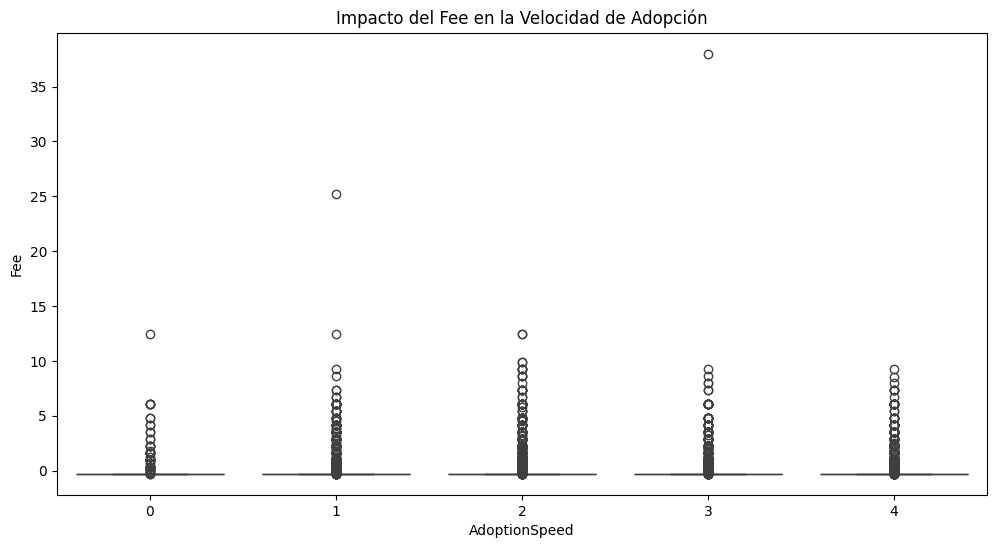

In [21]:
# Analizar el impacto del Fee
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='AdoptionSpeed', y='Fee')
plt.title('Impacto del Fee en la Velocidad de Adopción')
plt.show()


6. Estudiar las Regiones Geográficas Disponibles


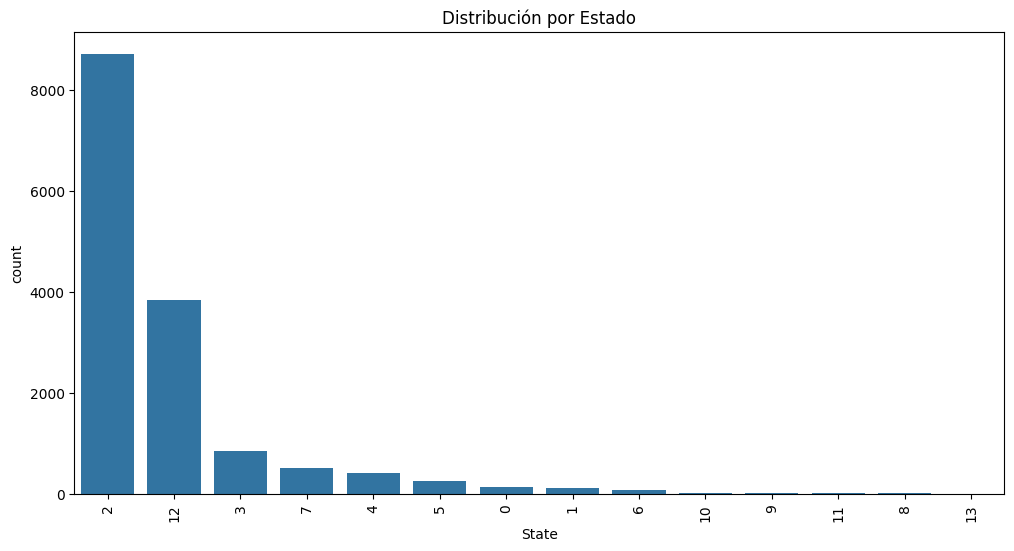

In [22]:
# Analizar las regiones geográficas
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='State', order=train_df['State'].value_counts().index)
plt.title('Distribución por Estado')
plt.xticks(rotation=90)
plt.show()


7. Analizar el Impacto de Tener Fotos y/o Videos


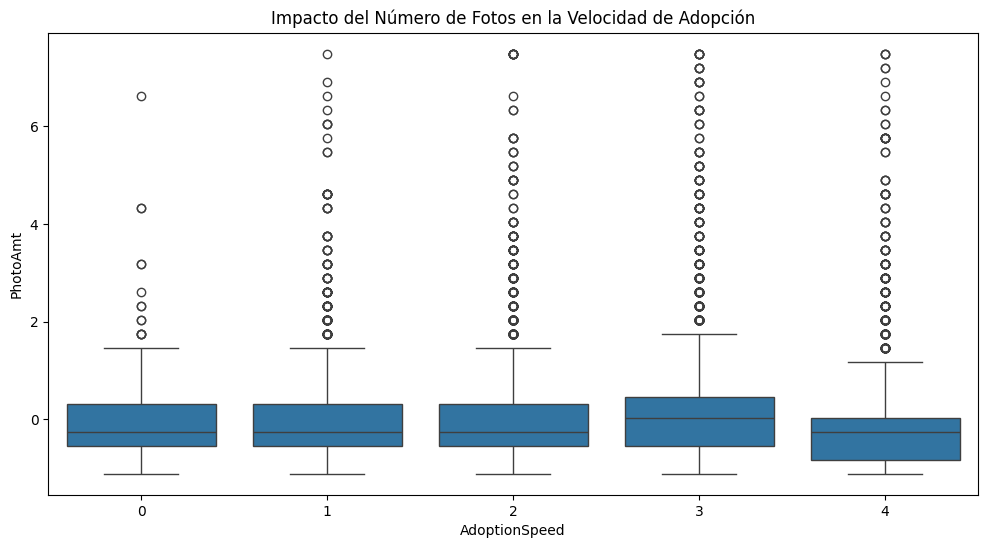

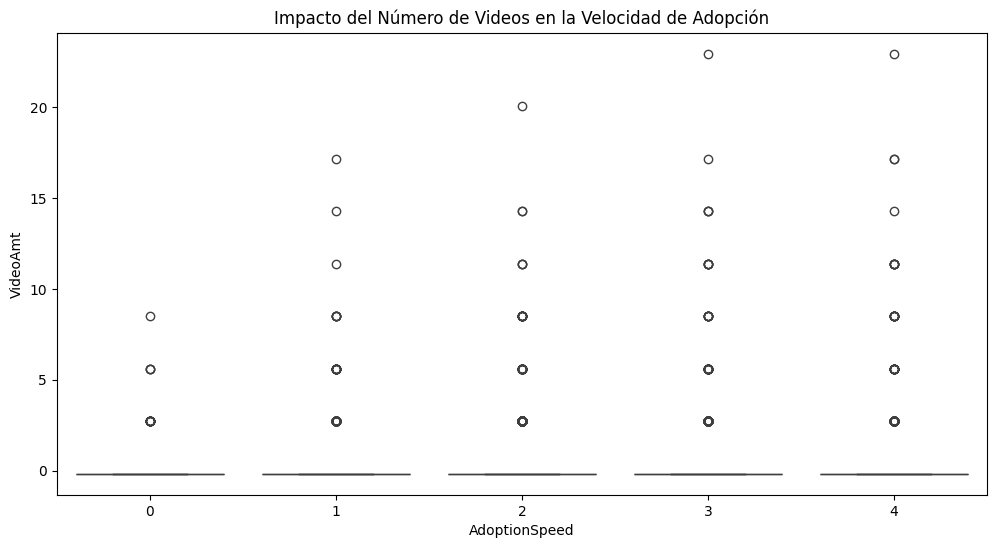

In [23]:
# Analizar el impacto de fotos y videos
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='AdoptionSpeed', y='PhotoAmt')
plt.title('Impacto del Número de Fotos en la Velocidad de Adopción')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='AdoptionSpeed', y='VideoAmt')
plt.title('Impacto del Número de Videos en la Velocidad de Adopción')
plt.show()


## Análisis del Texto Libre de la Descripción


1. Tokenizar Palabras más Frecuentes


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenizar y contar las palabras más frecuentes
vectorizer = CountVectorizer(stop_words='english', max_features=100)
word_counts = vectorizer.fit_transform(train_df['Description'])

# Mostrar las palabras más frecuentes
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
print("\nPalabras más frecuentes:")
print(word_counts_df.sum().sort_values(ascending=False).head(20))



Palabras más frecuentes:
home          7849
dog           4540
cat           4093
adoption      4025
good          3563
adopt         3343
old           2881
contact       2801
interested    2784
looking       2766
playful       2749
love          2689
loving        2665
kitten        2626
care          2468
puppy         2325
owner         2275
healthy       2260
cats          2193
house         2178
dtype: int64


2. Limpiar Palabras


In [25]:
# Limpiar texto de la descripción (ejemplo básico)
train_df['Cleaned_Description'] = train_df['Description'].str.replace(r'[^\w\s]', '').str.lower()


3. Bag of Words / TF-IDF


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Aplicar TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Cleaned_Description'])

# Convertir a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())



TF-IDF Matrix:
   abandoned  able    active     adopt  adopted  adopter  adopters  adoption  \
0        0.0   0.0  0.000000  0.000000      0.0      0.0       0.0  0.000000   
1        0.0   0.0  0.000000  0.000000      0.0      0.0       0.0  0.000000   
2        0.0   0.0  0.000000  0.209992      0.0      0.0       0.0  0.000000   
3        0.0   0.0  0.300515  0.000000      0.0      0.0       0.0  0.000000   
4        0.0   0.0  0.000000  0.196658      0.0      0.0       0.0  0.187213   

   adorable       age  ...      time  toilet  trained  vaccinated  \
0  0.000000  0.000000  ...  0.254738     0.0      0.0    0.000000   
1  0.000000  0.000000  ...  0.000000     0.0      0.0    0.000000   
2  0.277416  0.000000  ...  0.000000     0.0      0.0    0.304331   
3  0.000000  0.000000  ...  0.000000     0.0      0.0    0.000000   
4  0.000000  0.297925  ...  0.000000     0.0      0.0    0.000000   

   vaccination  vet  want  weeks  whatsapp  white  
0          0.0  0.0   0.0    0.0    

agregar las características TF-IDF al DataFrame original y analizar su relación con AdoptionSpeed.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar texto de la descripción (ejemplo básico)
train_df['Cleaned_Description'] = train_df['Description'].str.replace(r'[^\w\s]', '').str.lower()

# Aplicar TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Cleaned_Description'])

# Convertir a DataFrame y agregar al DataFrame original
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
train_df_tfidf = pd.concat([train_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


Verificar las palabras en el DataFrame


In [28]:
# Obtener las palabras disponibles en el DataFrame TF-IDF
available_words = tfidf_vectorizer.get_feature_names_out()
print("Palabras disponibles en el DataFrame TF-IDF:")
print(available_words)


Palabras disponibles en el DataFrame TF-IDF:
['abandoned' 'able' 'active' 'adopt' 'adopted' 'adopter' 'adopters'
 'adoption' 'adorable' 'age' 'area' 'attention' 'away' 'beautiful' 'birth'
 'black' 'boy' 'breed' 'care' 'cat' 'cats' 'contact' 'currently' 'cute'
 'dewormed' 'dog' 'dogs' 'don' 'eyes' 'family' 'fee' 'female' 'food'
 'forever' 'free' 'friend' 'friendly' 'fur' 'girl' 'good' 'healthy' 'help'
 'home' 'hope' 'house' 'interested' 'just' 'kind' 'kitten' 'kittens'
 'know' 'let' 'like' 'litter' 'little' 'long' 'looking' 'love' 'lovely'
 'loves' 'loving' 'male' 'manja' 'month' 'months' 'mother' 'need' 'needs'
 'neutering' 'new' 'old' 'owner' 'people' 'pet' 'play' 'playful' 'pls'
 'provide' 'puppies' 'puppy' 'really' 'rescued' 'siblings' 'sms' 'spay'
 'spayed' 'stray' 'sweet' 'thank' 'thanks' 'time' 'toilet' 'trained'
 'vaccinated' 'vaccination' 'vet' 'want' 'weeks' 'whatsapp' 'white']


Seleccionar palabras disponibles y visualizarlas


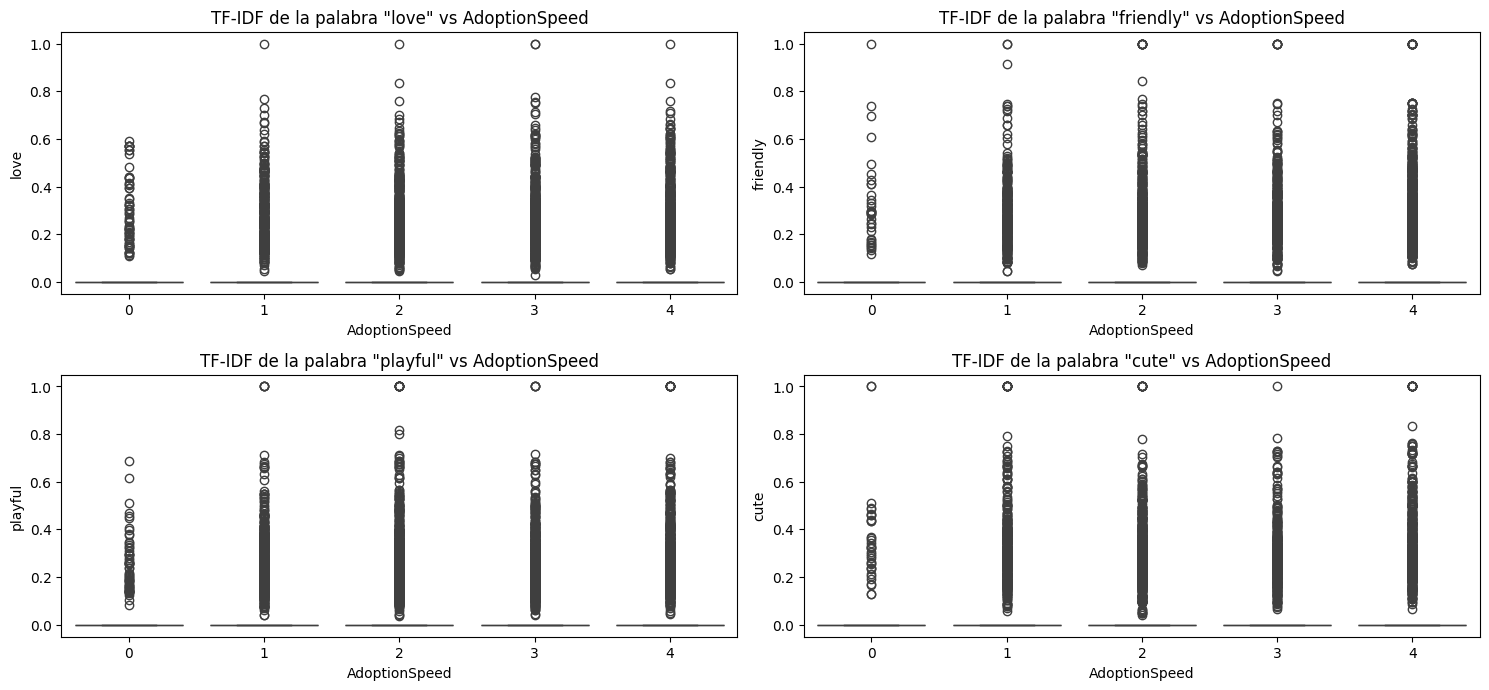

In [29]:
# Seleccionar algunas palabras disponibles
selected_words = ['love', 'friendly', 'playful', 'cute', 'happy']  # Cambia estas palabras según las palabras disponibles

# Filtrar las palabras disponibles
selected_words = [word for word in selected_words if word in available_words]

# Visualización de la distribución de las palabras por AdoptionSpeed
plt.figure(figsize=(15, 10))
for i, word in enumerate(selected_words, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train_df_tfidf, x='AdoptionSpeed', y=word)
    plt.title(f'TF-IDF de la palabra "{word}" vs AdoptionSpeed')
plt.tight_layout()
plt.show()


Mismo análisis pero en forma automatizada

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Palabras más positivamente correlacionadas con AdoptionSpeed:
dog         0.084277
friendly    0.061518
spayed      0.045088
good        0.041417
loving      0.038274
forever     0.035623
need        0.030029
home        0.028593
whatsapp    0.028073
year        0.027904
dtype: float64

Palabras más negativamente correlacionadas con AdoptionSpeed:
kitten     -0.077725
litter     -0.043711
adoption   -0.042504
long       -0.039326
toilet     -0.038389
sibling    -0.037938
week       -0.036340
male       -0.035774
new        -0.035072
adopted    -0.034816
dtype: float64


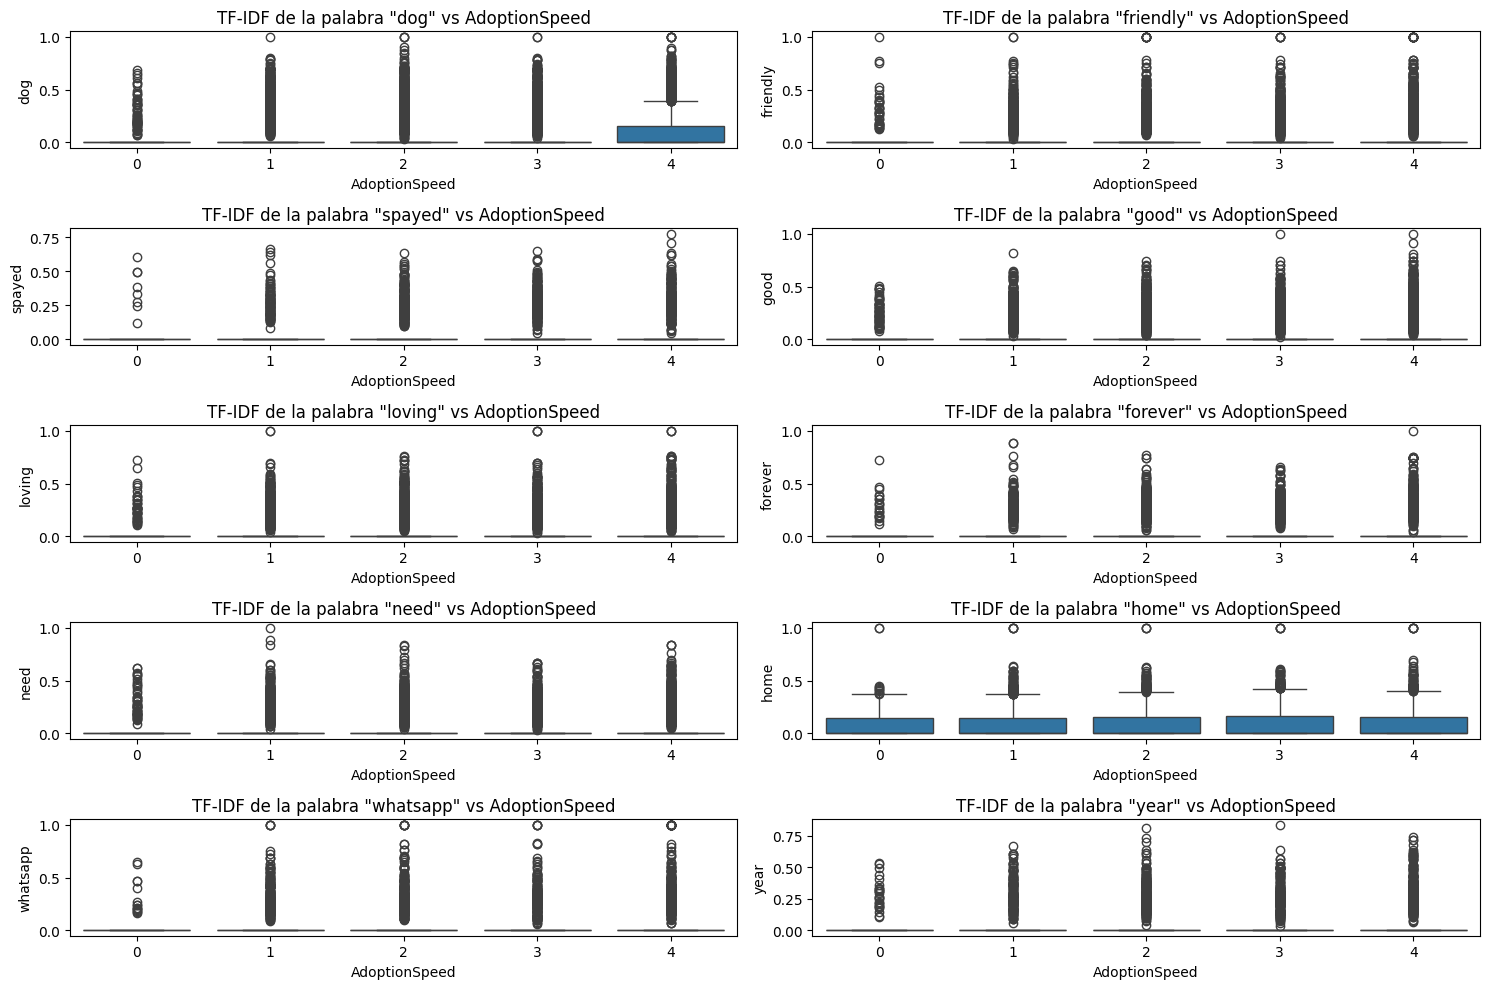

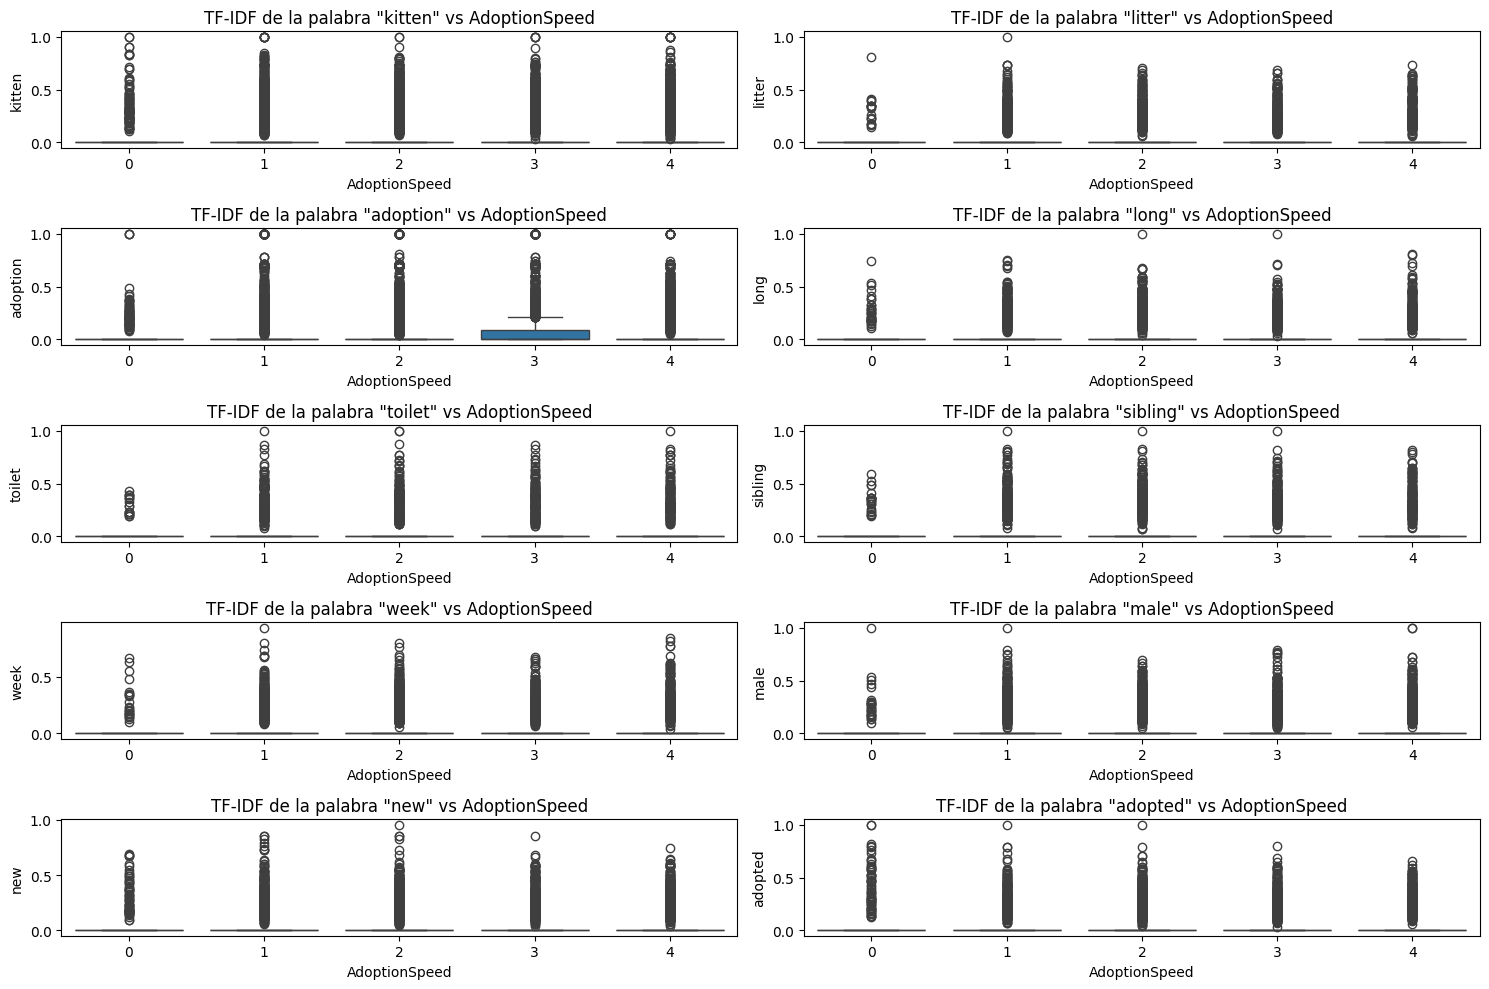

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer

# Descargar los recursos necesarios para la lematización (solo la primera vez)
nltk.download('punkt')
nltk.download('wordnet')

# Instanciar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar el texto
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)


# Limpiar texto de la descripción (ejemplo básico)
train_df['Cleaned_Description'] = train_df['Description'].str.replace(r'[^\w\s]', '').str.lower()

# Aplicar TF-IDF
#tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
#tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Cleaned_Description'])


# Aplicar la lematización a la columna 'Cleaned_Description'
train_df['Lemmatized_Description'] = train_df['Cleaned_Description'].apply(lemmatize_text)

# Aplicar TF-IDF a la columna 'Lemmatized_Description'
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Lemmatized_Description'])



# Convertir a DataFrame y agregar al DataFrame original
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
train_df_tfidf = pd.concat([train_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Calcular correlaciones
correlations = train_df_tfidf[tfidf_vectorizer.get_feature_names_out()].corrwith(train_df_tfidf['AdoptionSpeed'])

# Mostrar las palabras más correlacionadas positiva y negativamente
top_positive_correlations = correlations.sort_values(ascending=False).head(10)
top_negative_correlations = correlations.sort_values(ascending=True).head(10)

print("Palabras más positivamente correlacionadas con AdoptionSpeed:")
print(top_positive_correlations)

print("\nPalabras más negativamente correlacionadas con AdoptionSpeed:")
print(top_negative_correlations)

# Visualización de las palabras más positivamente correlacionadas
plt.figure(figsize=(15, 10))
for i, word in enumerate(top_positive_correlations.index, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=train_df_tfidf, x='AdoptionSpeed', y=word)
    plt.title(f'TF-IDF de la palabra "{word}" vs AdoptionSpeed')
plt.tight_layout()
plt.show()

# Visualización de las palabras más negativamente correlacionadas
plt.figure(figsize=(15, 10))
for i, word in enumerate(top_negative_correlations.index, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=train_df_tfidf, x='AdoptionSpeed', y=word)
    plt.title(f'TF-IDF de la palabra "{word}" vs AdoptionSpeed')
plt.tight_layout()
plt.show()


Crear características basadas en la presencia de palabras


In [37]:
# Lista de palabras correlacionadas
important_words = list(top_positive_correlations.index) + list(top_negative_correlations.index)

# Crear nuevas características para cada palabra
for word in important_words:
    train_df_tfidf[f'contains_{word}'] = train_df_tfidf['Lemmatized_Description'].apply(lambda x: 1 if word in x else 0)
    #train_df_tfidf[f'contains_{word}'] = train_df_tfidf['Cleaned_Description'].apply(lambda x: 1 if word in x else 0)

# Ver las nuevas características
print(train_df_tfidf[[f'contains_{word}' for word in important_words]].head())


   contains_dog  contains_friendly  contains_spayed  contains_good  \
0             0                  0                0              0   
1             0                  0                0              0   
2             1                  0                0              0   
3             1                  0                0              1   
4             0                  0                0              0   

   contains_loving  contains_forever  contains_need  contains_home  \
0                0                 0              0              0   
1                0                 0              0              1   
2                0                 0              0              1   
3                0                 0              0              0   
4                1                 0              1              1   

   contains_whatsapp  contains_year  contains_kitten  contains_litter  \
0                  0              0                0                0   
1           

2. Análisis y Visualización


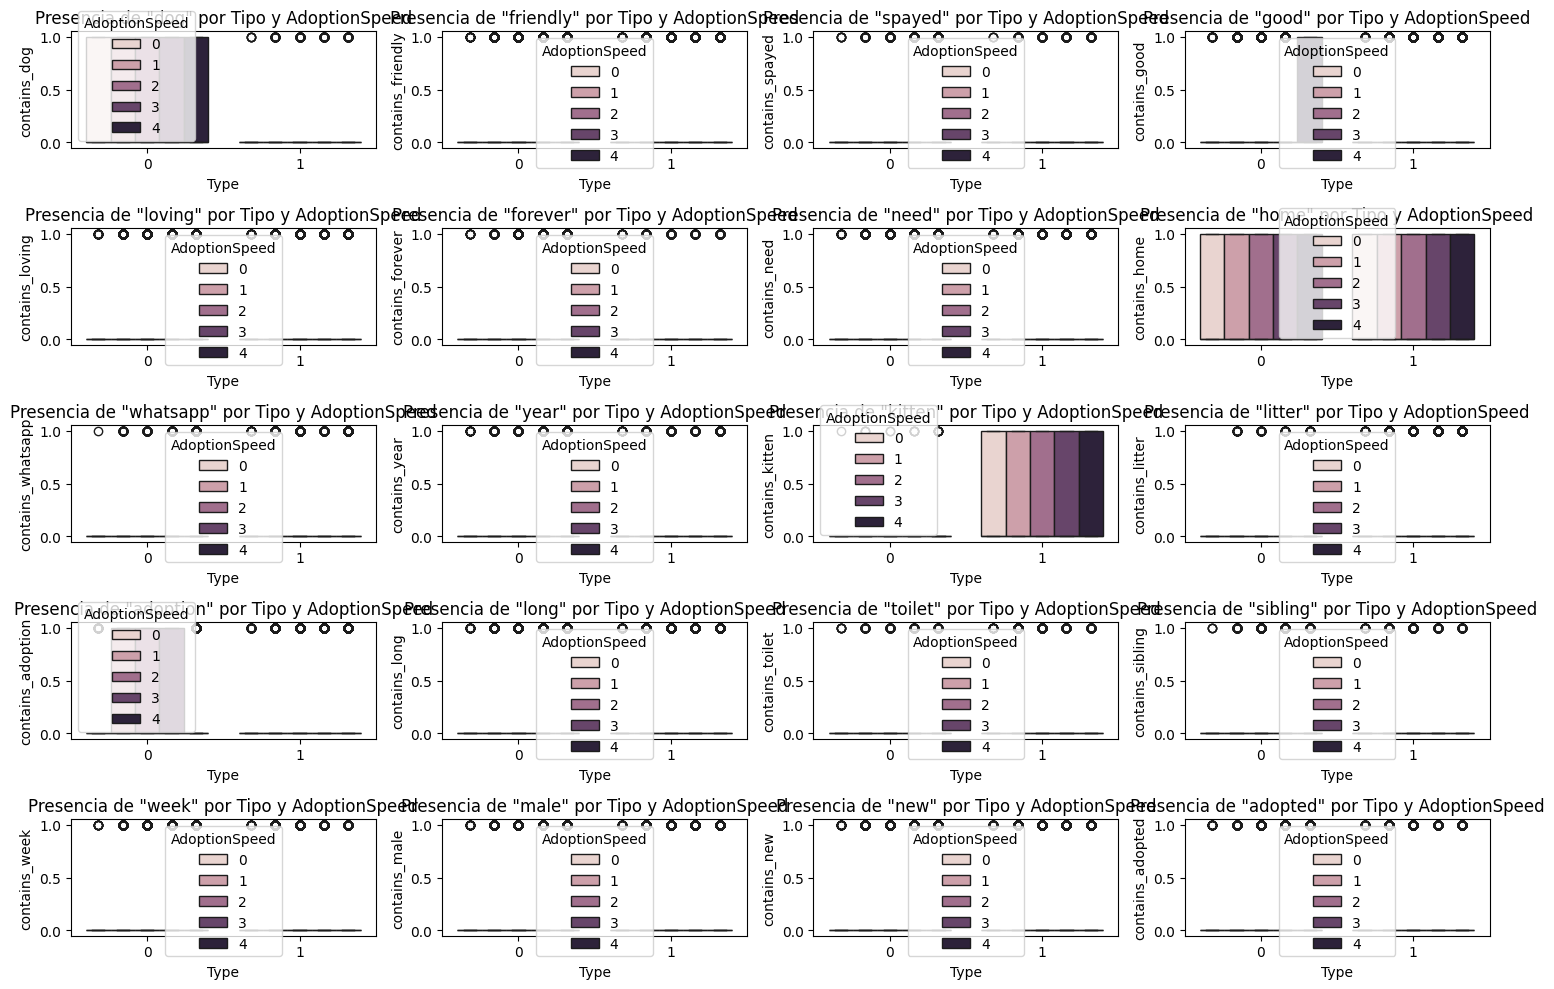

In [38]:
# Visualizar la presencia de palabras por tipo de mascota y AdoptionSpeed
plt.figure(figsize=(15, 10))
for i, word in enumerate(important_words, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=train_df_tfidf, x='Type', y=f'contains_{word}', hue='AdoptionSpeed')
    plt.title(f'Presencia de "{word}" por Tipo y AdoptionSpeed')
plt.tight_layout()
plt.show()
